# 3D Polycrystalline Microstructure Visualization and Analysis

This notebook provides comprehensive 3D microstructure visualization capabilities for large-scale polycrystalline systems using advanced energy calculation methods. It specializes in analyzing 264x264x264 domain sizes with 5000 initial grains, offering both cross-sectional views and full 3D contour visualizations.

## Scientific Background

- **Large-Scale 3D Systems**: 264³ domain with 5000 initial grains for realistic microstructures
- **Energy Method Comparison**: Isotropic vs. anisotropic (ave, min, max) energy formulations
- **HiPerGator Processing**: 64-core parallel optimization for large 3D datasets
- **Multi-Dimensional Analysis**: Cross-sectional slicing across all three spatial dimensions
- **Temporal Evolution**: Complete time-series analysis of 3D grain growth

## Key Features

- **3D Contour Visualization**: Full volumetric representation with surface projections
- **Cross-Sectional Analysis**: Systematic slicing across X, Y, and Z dimensions
- **Energy Method Comparison**: Systematic comparison of different energy formulations
- **High-Resolution Output**: Publication-quality 3D visualizations
- **Temporal Tracking**: Complete evolution documentation across simulation time

## Visualization Capabilities

1. **Cross-Sectional Views**: Systematic slicing through 3D volumes
2. **3D Contour Plots**: Surface projections on domain boundaries
3. **Multi-Dimensional Slicing**: Analysis across all three spatial dimensions
4. **Time-Series Animation**: Temporal evolution visualization capabilities
5. **Comparative Analysis**: Side-by-side energy method comparisons

## Research Applications

- Large-scale 3D grain growth simulation analysis
- Energy method validation in realistic 3D microstructures
- Cross-sectional microstructure characterization
- 3D grain boundary network evolution studies
- Computational method benchmarking for large systems

## Technical Specifications

- **Domain Size**: 264×264×264 lattice points
- **Initial Grains**: 5000 oriented polycrystalline grains
- **Energy Methods**: Isotropic (delta=0.0) and anisotropic (delta=0.6) formulations
- **Processing**: 64-core HiPerGator cluster optimization
- **Temperature**: kt=1.95 for controlled 3D kinetic regime

In [ ]:
# Import Libraries and Configure 3D Microstructure Analysis Environment
# ======================================================================
# Essential libraries for large-scale 3D polycrystalline microstructure visualization

import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')  # Enable numpy error reporting for debugging large datasets
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm  # Progress tracking for extensive 3D processing
import sys

# Configure system paths for VECTOR framework access
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
import post_processing  # Advanced post-processing for 3D microstructure analysis
sys.path.append(current_path+'/../calculate_tangent/')

# Reload post-processing module to ensure latest 3D capabilities
import importlib
importlib.reload(post_processing)

print("3D microstructure analysis environment configured successfully")
print("Large-scale 3D visualization capabilities loaded")

<module 'post_processing' from '/home/lin.yang/projects/VECTOR/examples/microstructure/../../post_processing.py'>

In [ ]:
# 3D Microstructure Data Loading and Energy Method Configuration
# ==============================================================

"""
Large-Scale 3D Polycrystalline Data Analysis Setup

This section loads and configures large-scale 3D microstructure datasets for 
comprehensive analysis of energy method effects in realistic polycrystalline 
systems. It processes 264³ domain simulations with 5000 initial grains using 
multiple energy calculation approaches.

System Configuration:
--------------------
- Domain: 264×264×264 lattice points (realistic 3D scale)
- Initial grains: 5000 oriented polycrystalline grains
- HiPerGator: 64-core parallel processing optimization
- Temperature: kt=1.95 (3D kinetic regime)
- Reference: [1,0,0] crystallographic orientation

Energy Method Comparison:
------------------------
- Isotropic: delta=0.0 (baseline case without anisotropy)
- Anisotropic Average: delta=0.6 (standard anisotropic energy)
- Anisotropic Minimum: delta=0.6 (minimum energy selection)
- Anisotropic Maximum: delta=0.6 (maximum energy selection)
"""

if __name__ == '__main__':
    print("Starting 3D microstructure data loading...")
    
    # HiPerGator cluster data location for large-scale 3D simulations
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/3d_poly/results/"
    
    # Dataset identifier for 264³ domain with 5k initial grains
    data_type = "264_5k"
    print(f"Processing dataset: {data_type} (264³ domain, 5000 initial grains)")
    
    # Construct file names for systematic energy method comparison
    # Common parameters: 64-core, kt=1.95, m=2, J=1, [1,0,0] reference, seed=56689
    npy_file_name_iso = f"p_ori_ave_aveE_{data_type}_multiCore64_delta0.0_m2_J1_refer_1_0_0_seed56689_kt1.95.npy"
    npy_file_name_aniso_ave = f"p2_ori_ave_aveE_{data_type}_multiCore64_delta0.6_m2_J1_refer_1_0_0_seed56689_kt1.95.npy"
    npy_file_name_aniso_min = f"p_ori_ave_minE_{data_type}_multiCore64_delta0.6_m2_J1_refer_1_0_0_seed56689_kt1.95.npy"
    npy_file_name_aniso_max = f"p_ori_ave_maxE_{data_type}_multiCore64_delta0.6_m2_J1_refer_1_0_0_seed56689_kt1.95.npy"
    
    print("Loading large-scale 3D microstructure datasets...")
    
    # Load 3D microstructure evolution data for energy method comparison
    # Each dataset contains 5D arrays: [time, x, y, z, grain_features]
    npy_file_iso = np.load(npy_file_folder + npy_file_name_iso)
    npy_file_aniso_ave = np.load(npy_file_folder + npy_file_name_aniso_ave)
    npy_file_aniso_min = np.load(npy_file_folder + npy_file_name_aniso_min)
    npy_file_aniso_max = np.load(npy_file_folder + npy_file_name_aniso_max)
    
    # Display dataset dimensions for verification
    print(f"\\n=== 3D Dataset Dimensions ===")
    print(f"The {data_type} isotropic case size is: {npy_file_iso.shape}")
    print(f"The {data_type} anisotropic average case size is: {npy_file_aniso_ave.shape}")
    print(f"The {data_type} anisotropic minimum case size is: {npy_file_aniso_min.shape}")
    print(f"The {data_type} anisotropic maximum case size is: {npy_file_aniso_max.shape}")
    print("\\n✓ 3D MICROSTRUCTURE DATA LOADING COMPLETED")
    
    # Verify data consistency across energy methods
    expected_shape = npy_file_iso.shape
    datasets = [('Average', npy_file_aniso_ave), ('Minimum', npy_file_aniso_min), ('Maximum', npy_file_aniso_max)]
    
    print(f"\\n=== Data Consistency Verification ===")
    for name, dataset in datasets:
        if dataset.shape == expected_shape:
            print(f"✓ {name} energy method: Shape consistent")
        else:
            print(f"⚠️  {name} energy method: Shape mismatch detected")
    
    print(f"\\nReady for 3D microstructure analysis and visualization...")

The 264_5k iso case size is: (76, 264, 264, 264)
The 264_5k ave case size is: (76, 264, 264, 264)
The 264_5k min case size is: (76, 264, 264, 264)
The 264_5k max case size is: (76, 264, 264, 264)
READING DATA DONE


/home/lin.yang/projects/VECTOR/examples/microstructure/../../post_processing.py:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


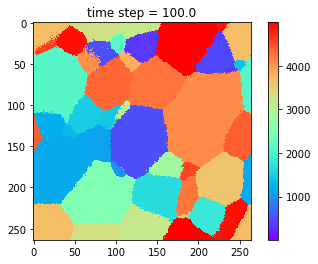

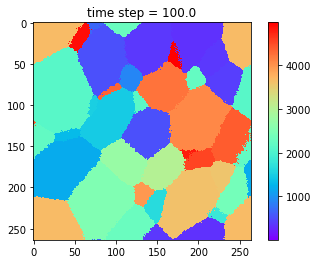

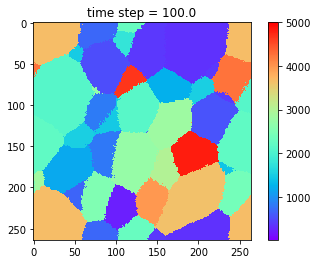

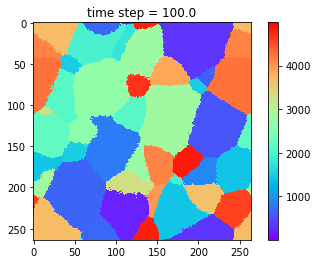

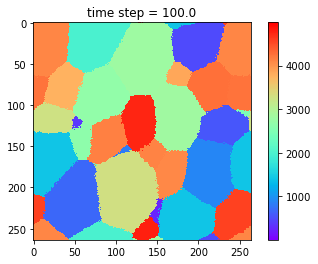

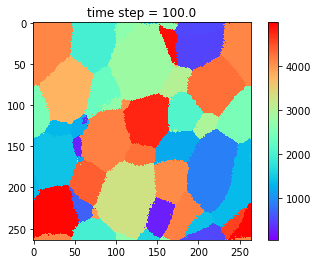

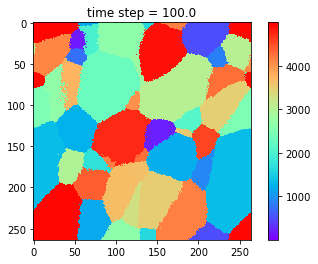

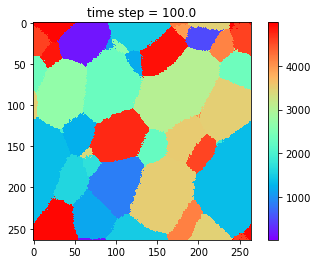

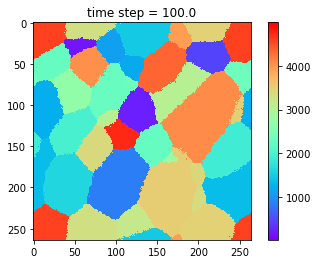

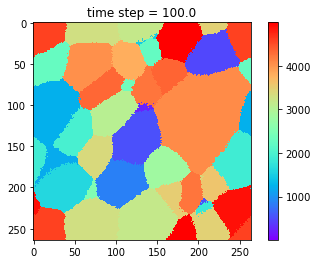

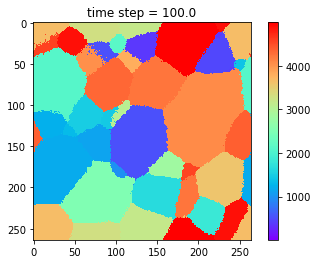

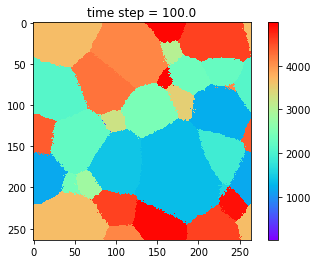

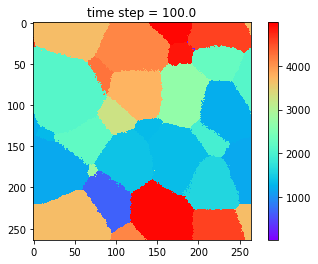

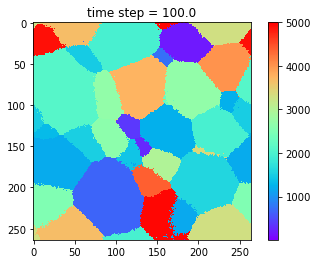

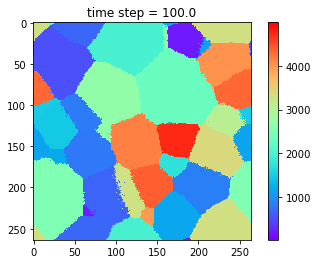

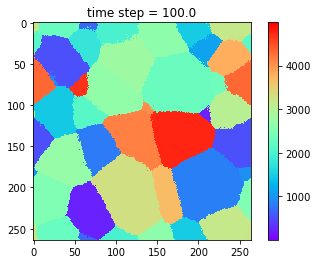

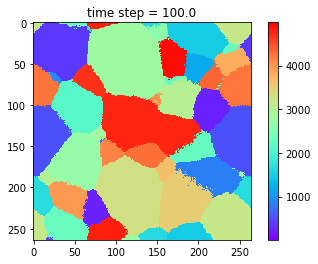

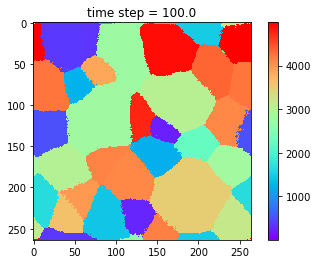

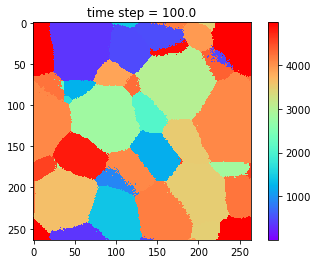

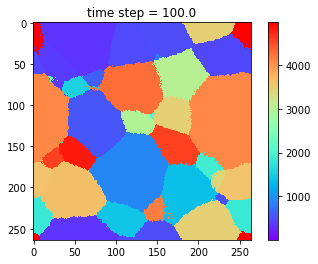

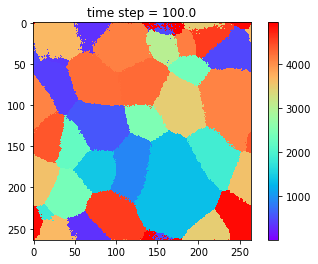

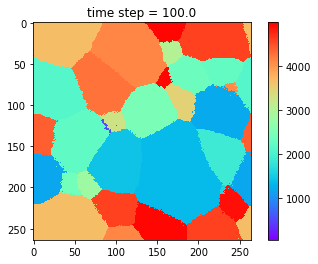

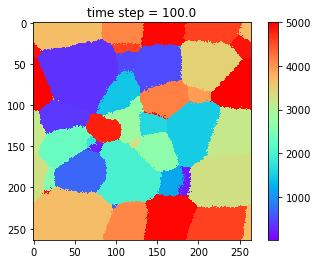

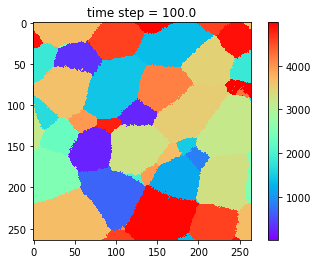

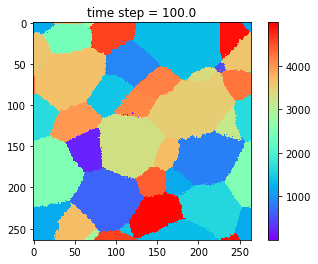

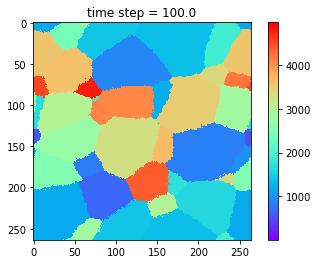

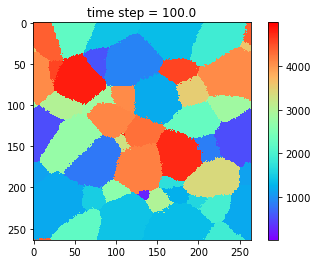

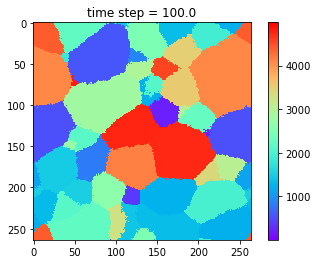

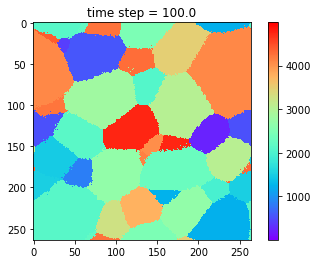

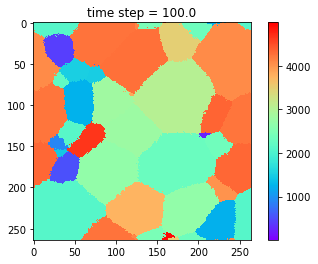

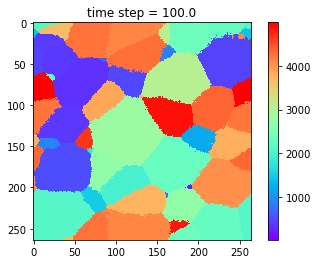

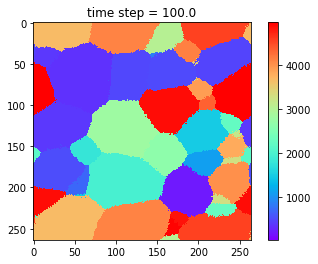

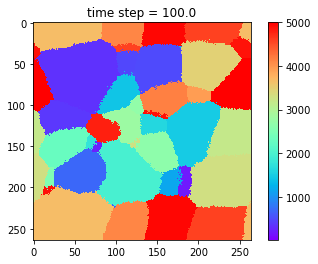

In [ ]:
# 3D Cross-Sectional Analysis and Multi-Dimensional Slicing
# ========================================================

"""
Systematic 3D Microstructure Cross-Sectional Visualization

This section performs comprehensive cross-sectional analysis of 3D microstructures
by systematically slicing through the volume in all three spatial dimensions.
It generates time-series visualizations for each cross-section to document
grain evolution patterns throughout the 3D domain.

Analysis Strategy:
-----------------
- Multi-dimensional slicing: X, Y, and Z directions
- Systematic depth sampling: 11 levels per dimension
- Time-series generation: Complete temporal evolution
- Cross-sectional comparison: Energy method effects across slices

Visualization Approach:
----------------------
- Dimension 0: YZ cross-sections (slicing along X-axis)
- Dimension 1: XZ cross-sections (slicing along Y-axis) 
- Dimension 2: XY cross-sections (slicing along Z-axis)
- Uniform depth distribution: Equal spacing across domain
"""

print("Configuring 3D cross-sectional analysis parameters...")

# Use anisotropic average dataset as primary analysis target
npy_file_aniso = npy_file_aniso_ave  # Primary dataset for cross-sectional analysis

# Temporal analysis configuration
steps_num = len(npy_file_aniso)                           # Total simulation timesteps
time_steps = np.linspace(0, steps_num-1, steps_num)*2     # Time scaling for visualization

print(f"Temporal analysis: {steps_num} timesteps (scaled by factor of 2)")

# Generate systematic depth sampling across all three dimensions
# 11 levels provide comprehensive coverage while maintaining computational efficiency
depth_list0 = list(map(int, np.linspace(0, npy_file_aniso.shape[1]-1, 11)))  # X-dimension depths
depth_list1 = list(map(int, np.linspace(0, npy_file_aniso.shape[2]-1, 11)))  # Y-dimension depths  
depth_list2 = list(map(int, np.linspace(0, npy_file_aniso.shape[3]-1, 11)))  # Z-dimension depths

print(f"Cross-sectional sampling configuration:")
print(f"  X-dimension depths: {depth_list0}")
print(f"  Y-dimension depths: {depth_list1}")
print(f"  Z-dimension depths: {depth_list2}")

print("\\nStarting systematic 3D cross-sectional visualization...")

# Systematic cross-sectional analysis across all three spatial dimensions
dimension_list = [0, 1, 2]  # X, Y, Z slicing directions

total_slices = 0
for dimension in dimension_list:
    dimension_name = ['X', 'Y', 'Z'][dimension]
    depth_list = [depth_list0, depth_list1, depth_list2][dimension]
    
    print(f"\\n--- Processing {dimension_name}-direction cross-sections ---")
    
    for i, depth in enumerate(depth_list2):  # Using Z-depth list for all dimensions
        print(f"  Generating cross-section {i+1}/11 at depth {depth}...")
        
        # Generate systematic file naming for cross-sectional analysis
        figure_path = current_path + f"/figures/3Dmicrostructure_264D5k_dimension{dimension}_depth{depth}"
        
        # Create time-series visualization for current cross-section
        # This generates complete temporal evolution for the selected slice
        post_processing.plot_structure_video(time_steps, npy_file_aniso, figure_path, dimension, depth)
        
        total_slices += 1

print(f"\\n🎉 3D Cross-sectional analysis completed!")
print(f"   Generated {total_slices} cross-sectional time-series visualizations")
print(f"   Coverage: {len(dimension_list)} dimensions × 11 depths = {len(dimension_list)*11} total slices")
print(f"   Each slice includes {steps_num} temporal frames")

/scratch/local/27421033/ipykernel_4118200/2995025085.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

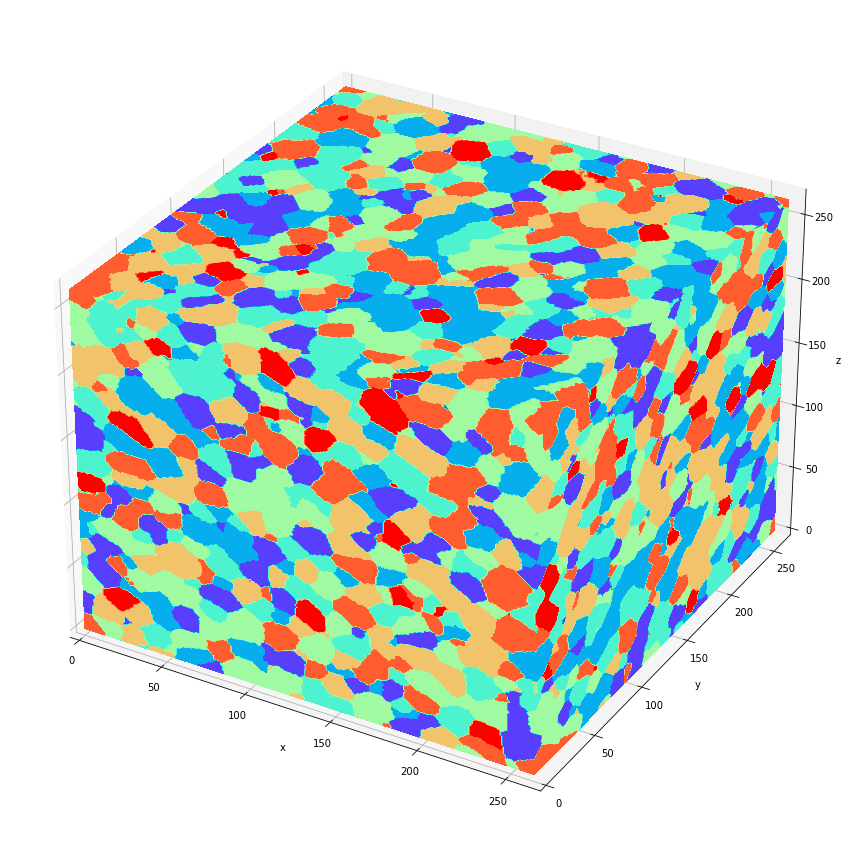

<Figure size 432x288 with 0 Axes>

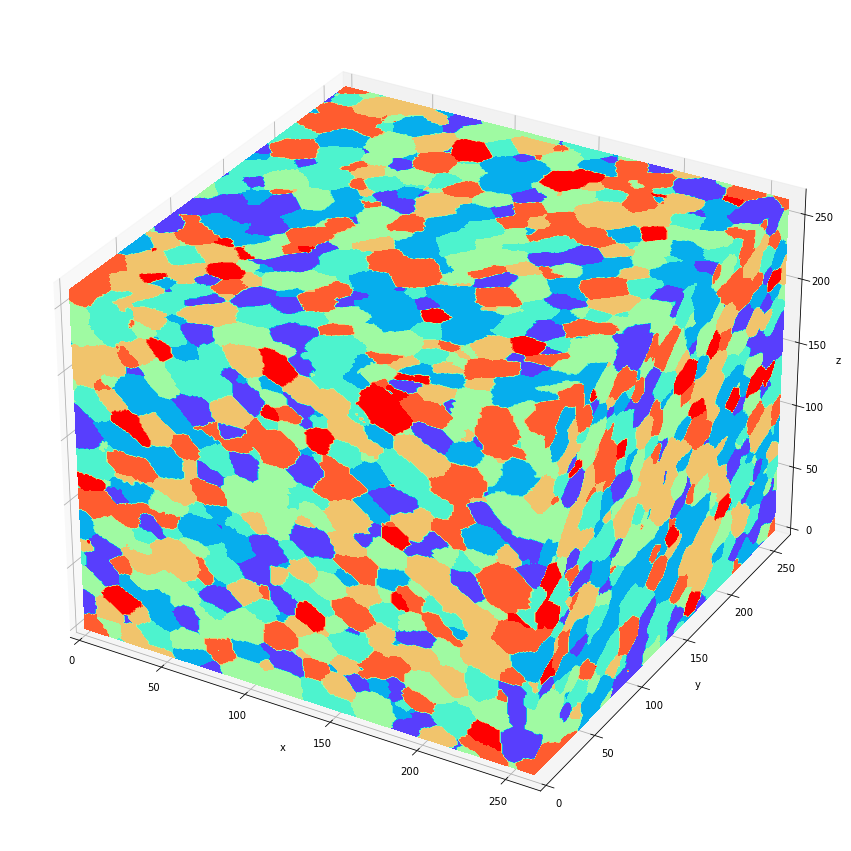

<Figure size 432x288 with 0 Axes>

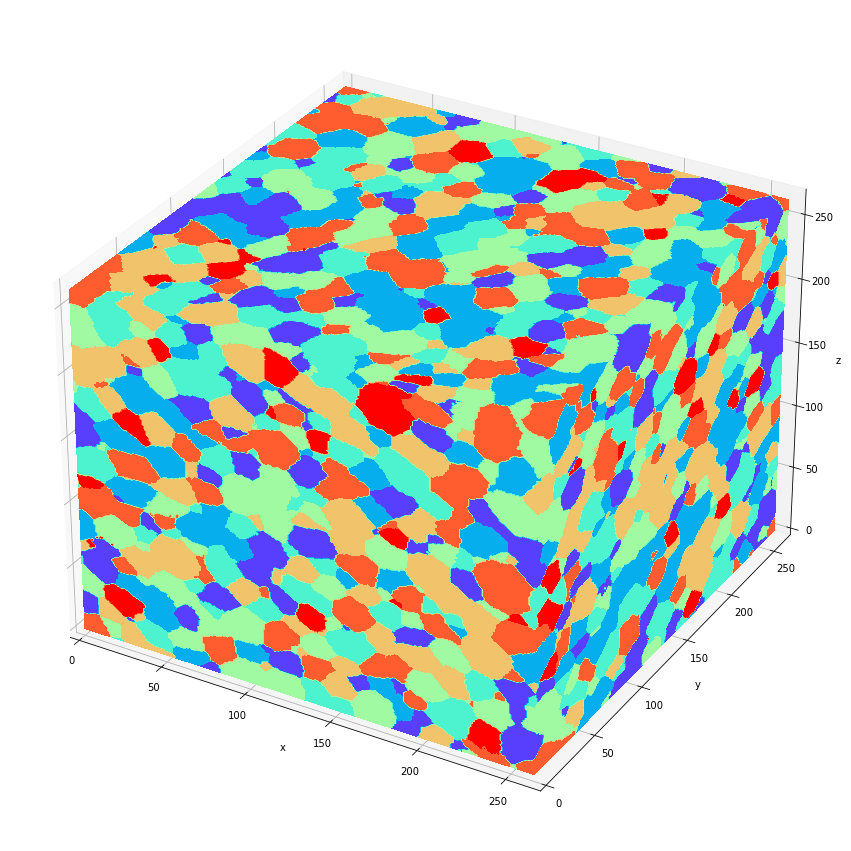

<Figure size 432x288 with 0 Axes>

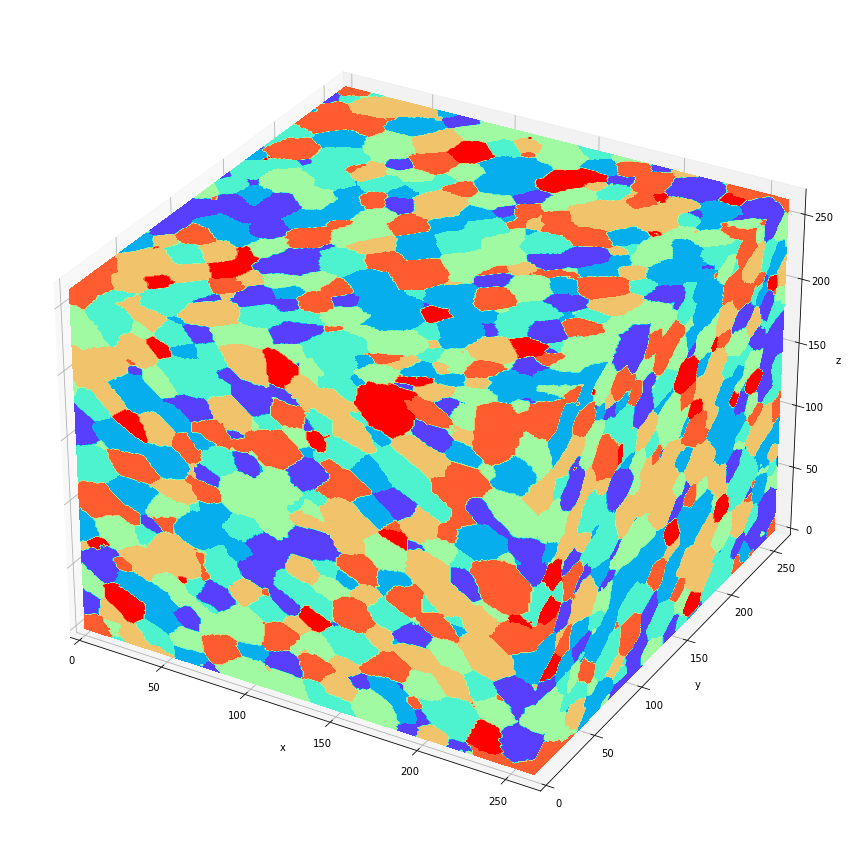

<Figure size 432x288 with 0 Axes>

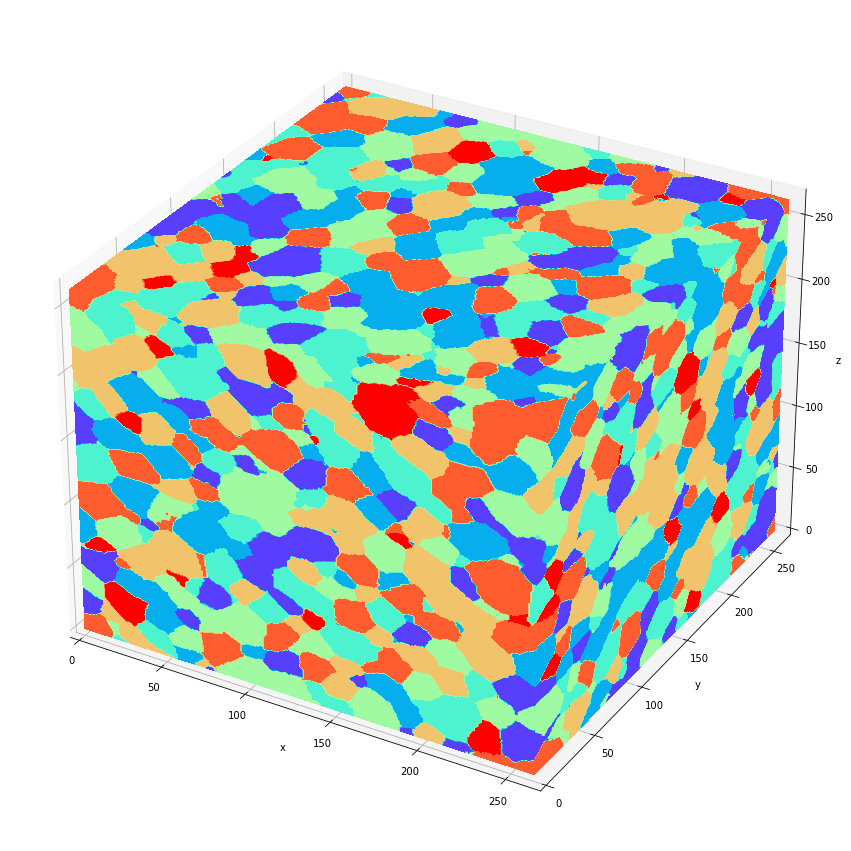

<Figure size 432x288 with 0 Axes>

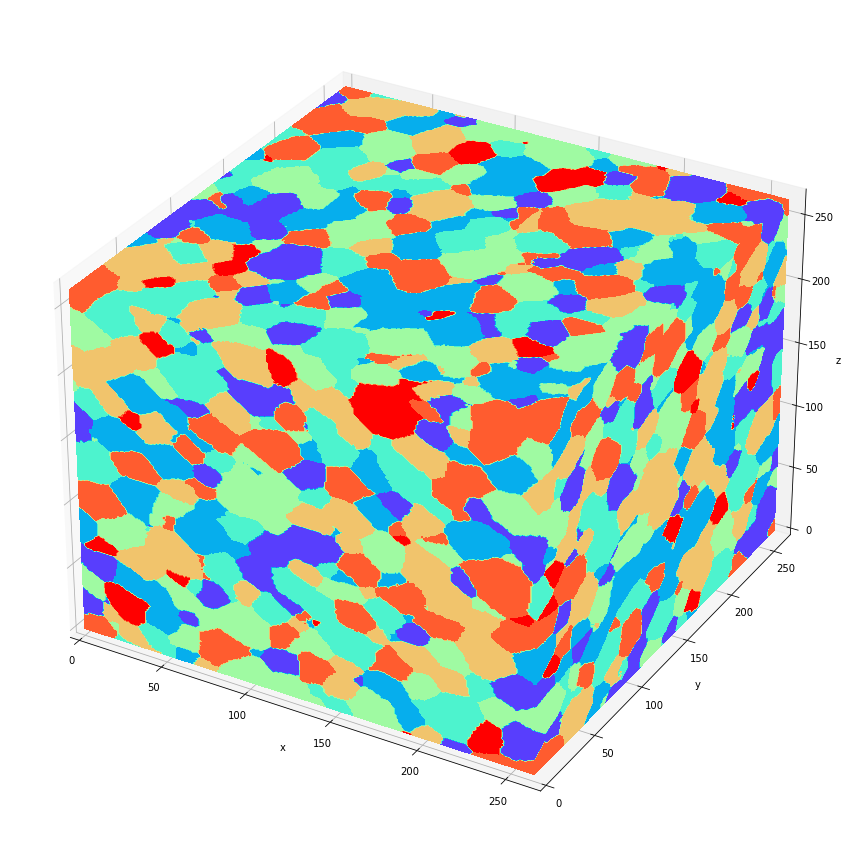

<Figure size 432x288 with 0 Axes>

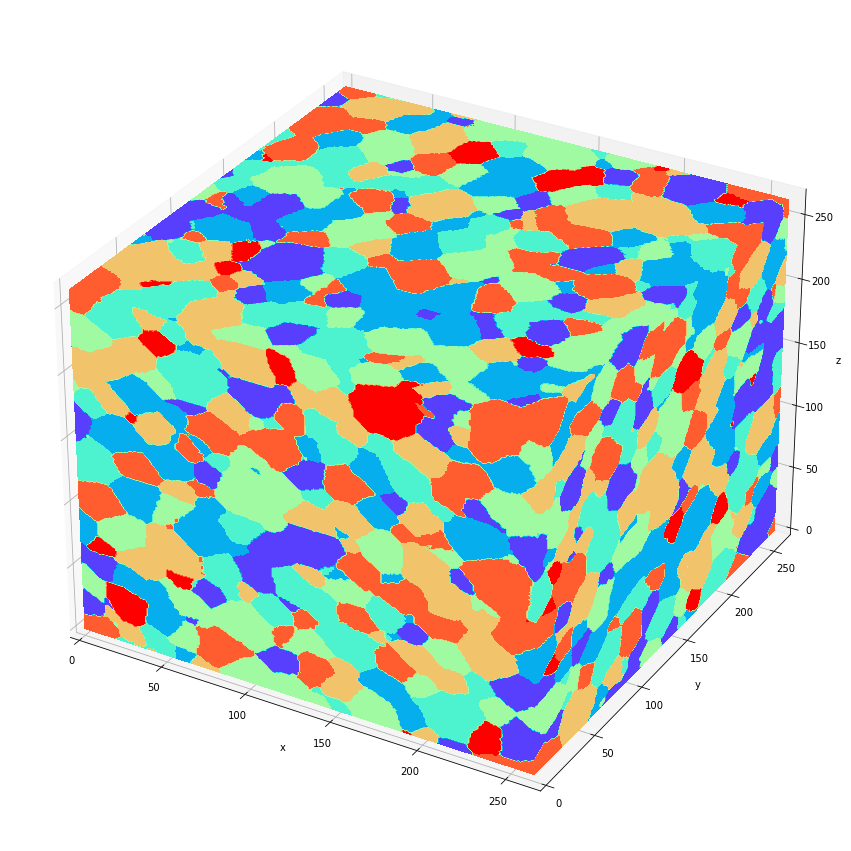

<Figure size 432x288 with 0 Axes>

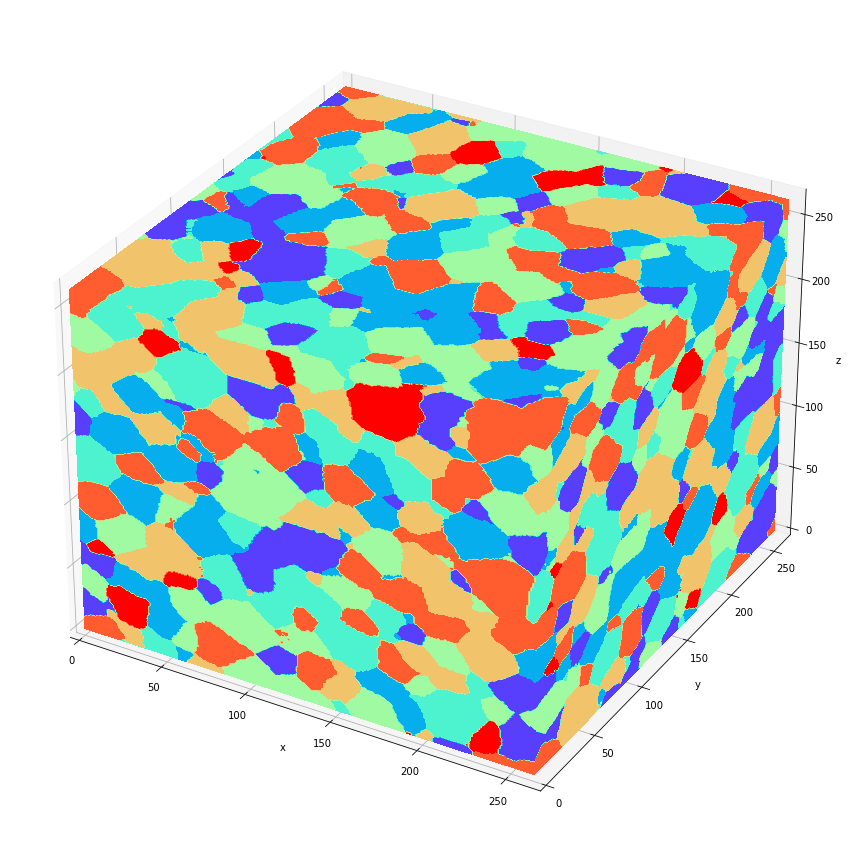

<Figure size 432x288 with 0 Axes>

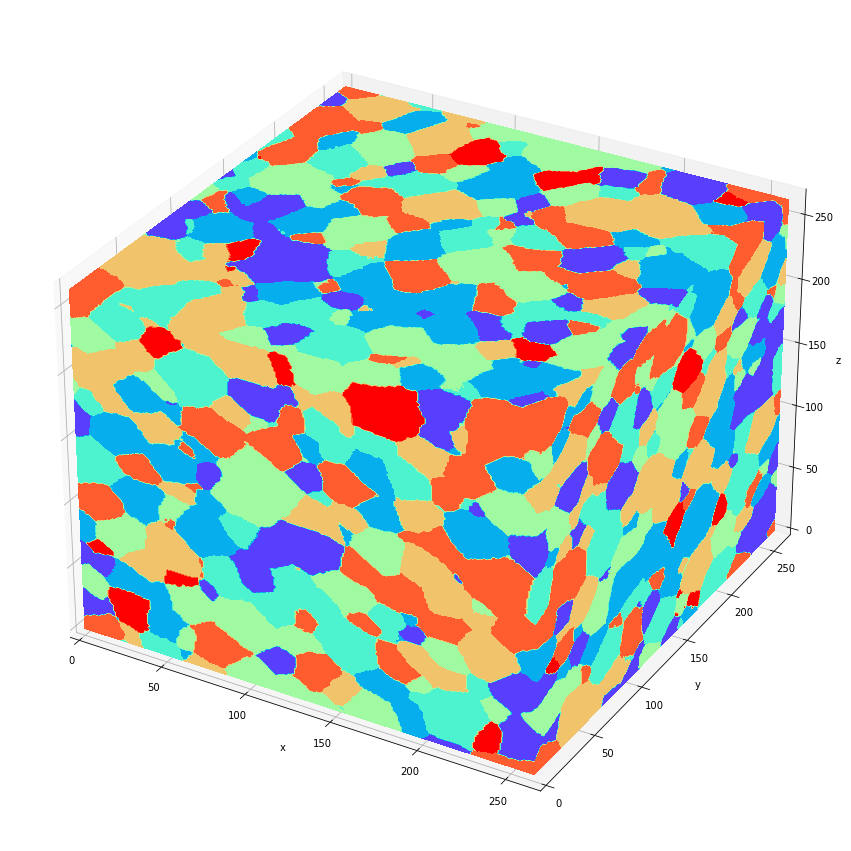

<Figure size 432x288 with 0 Axes>

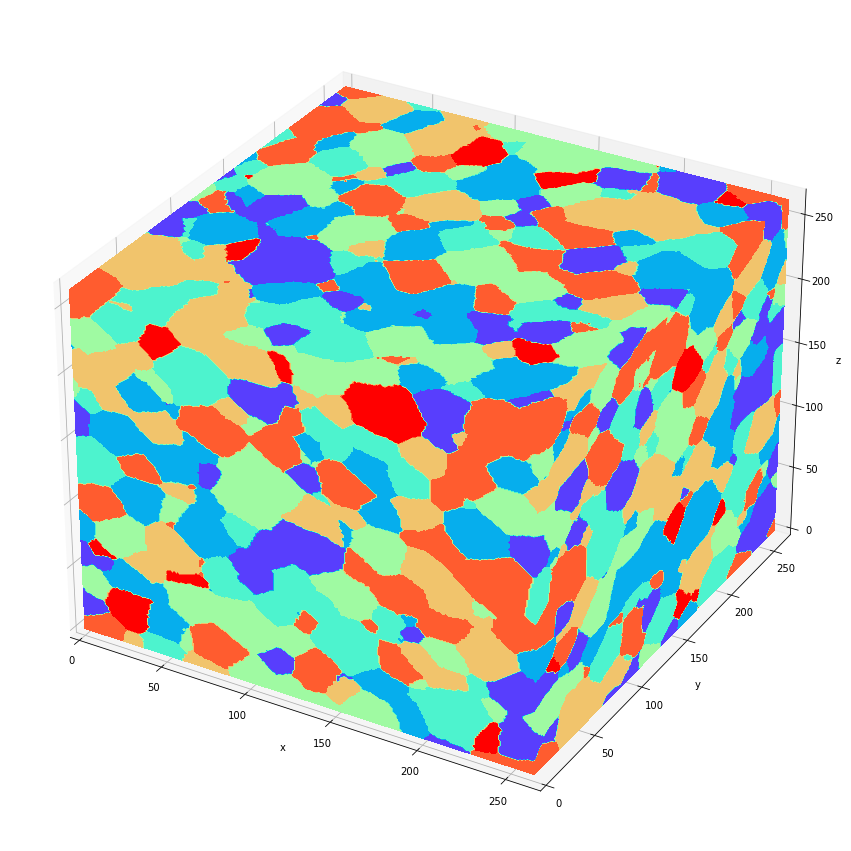

<Figure size 432x288 with 0 Axes>

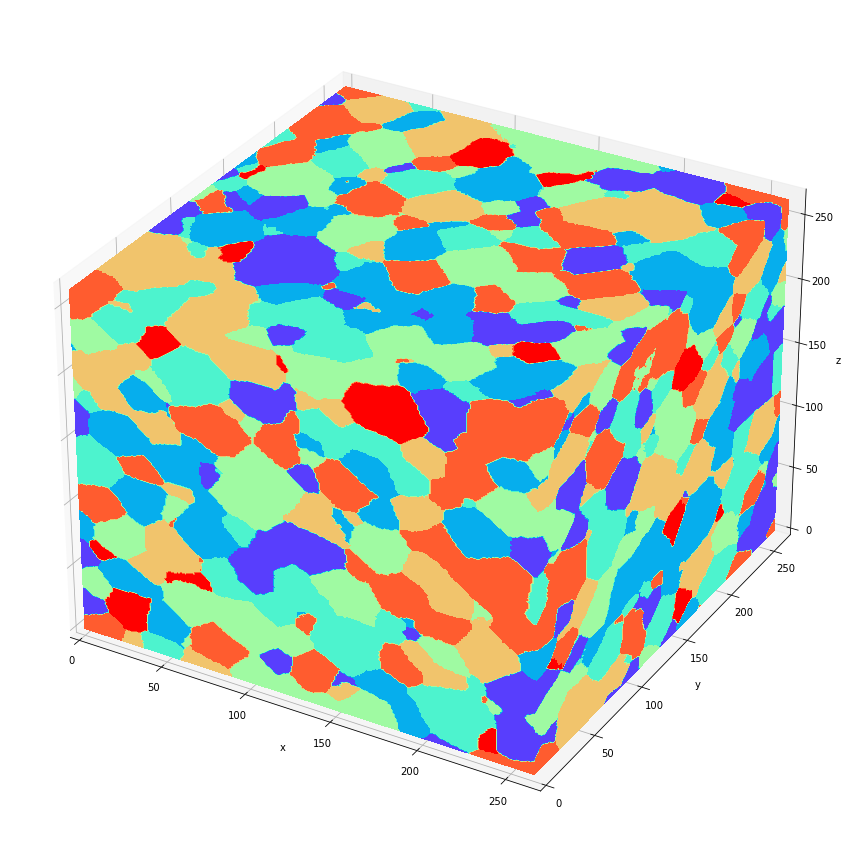

<Figure size 432x288 with 0 Axes>

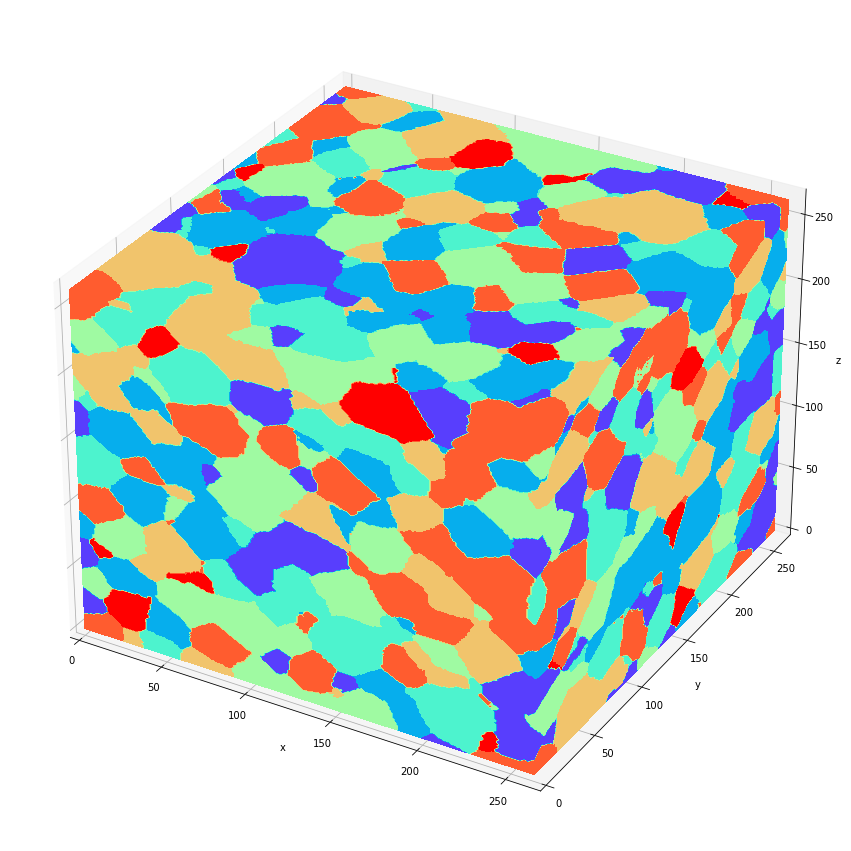

<Figure size 432x288 with 0 Axes>

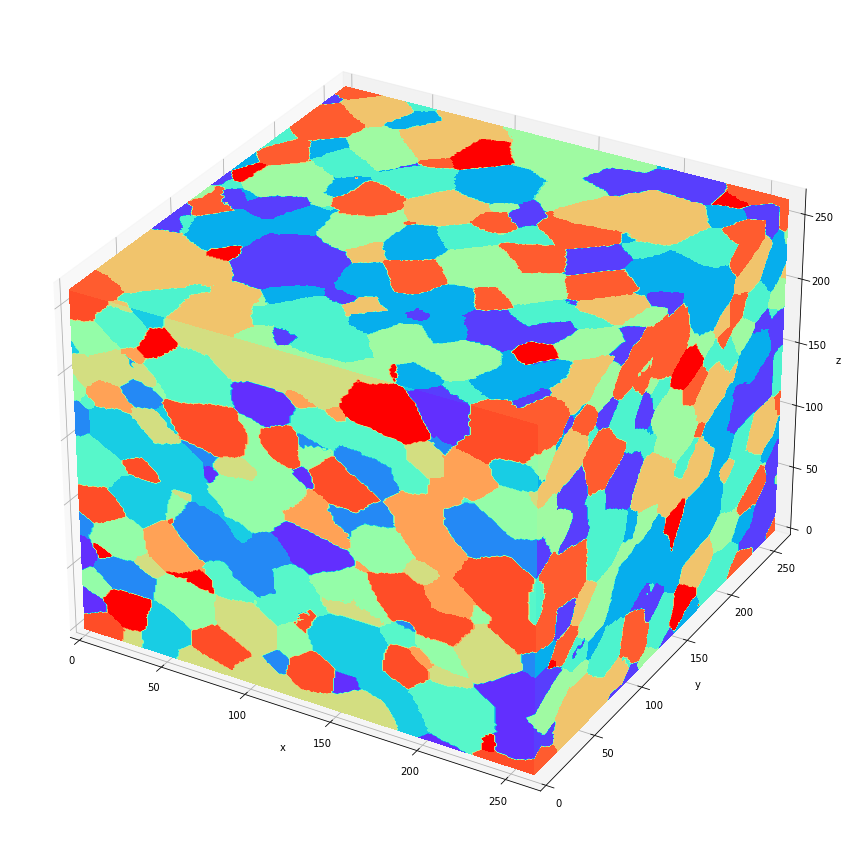

<Figure size 432x288 with 0 Axes>

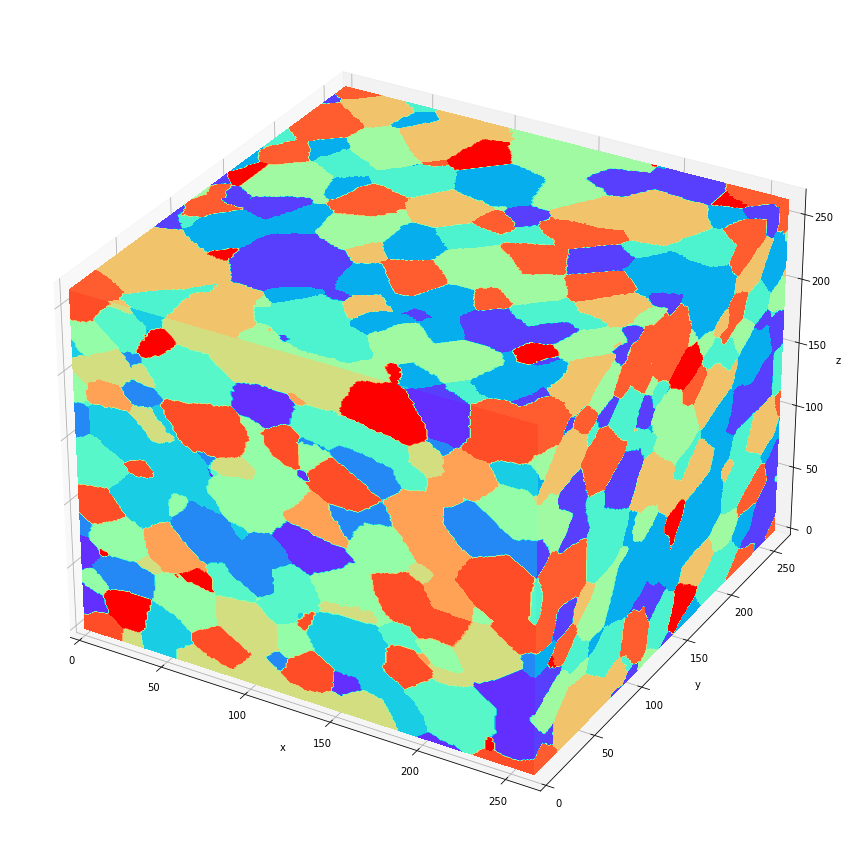

<Figure size 432x288 with 0 Axes>

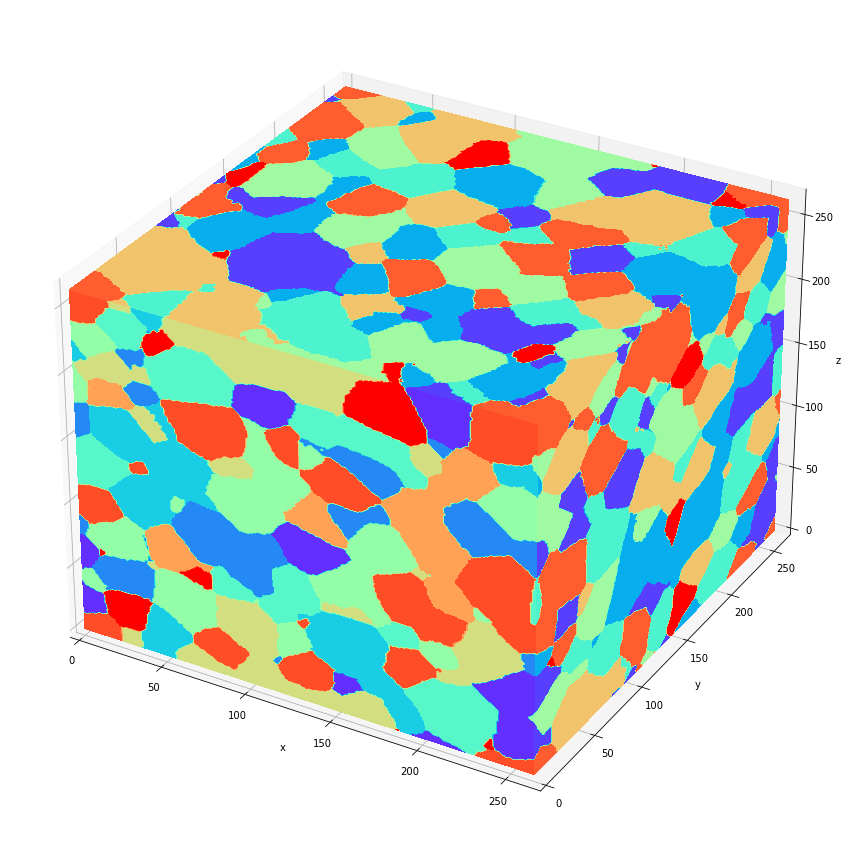

<Figure size 432x288 with 0 Axes>

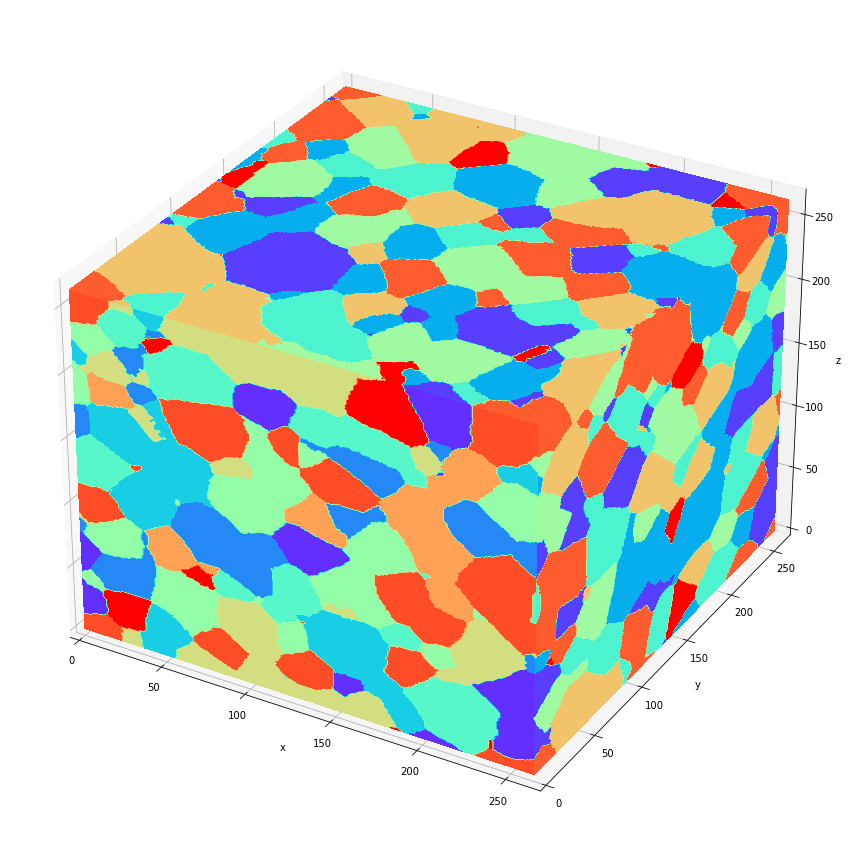

<Figure size 432x288 with 0 Axes>

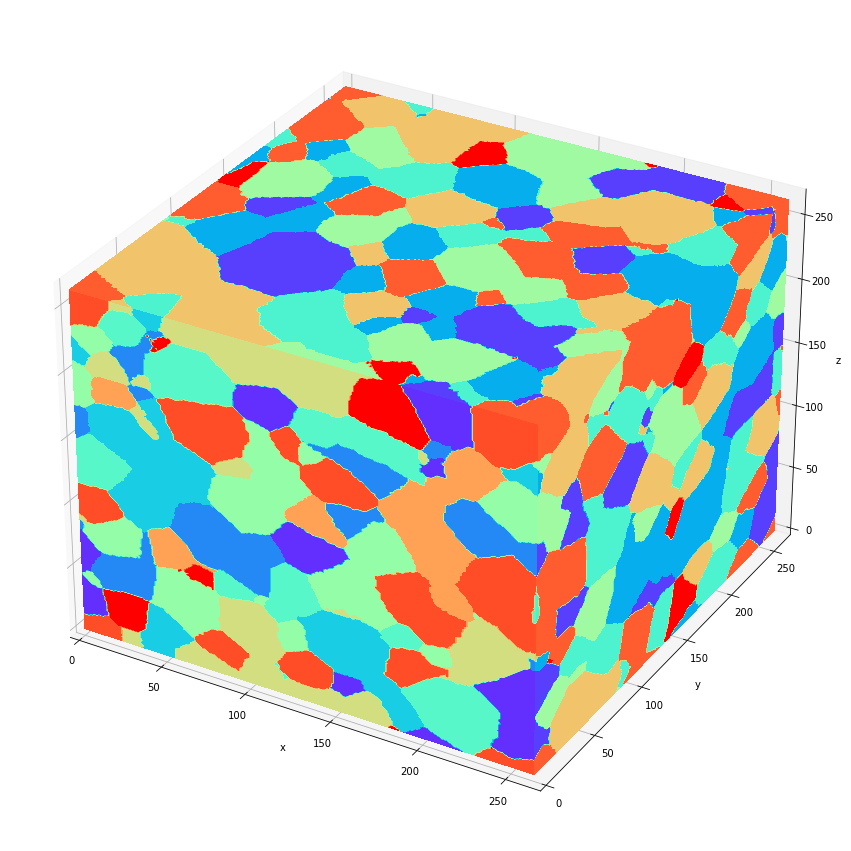

<Figure size 432x288 with 0 Axes>

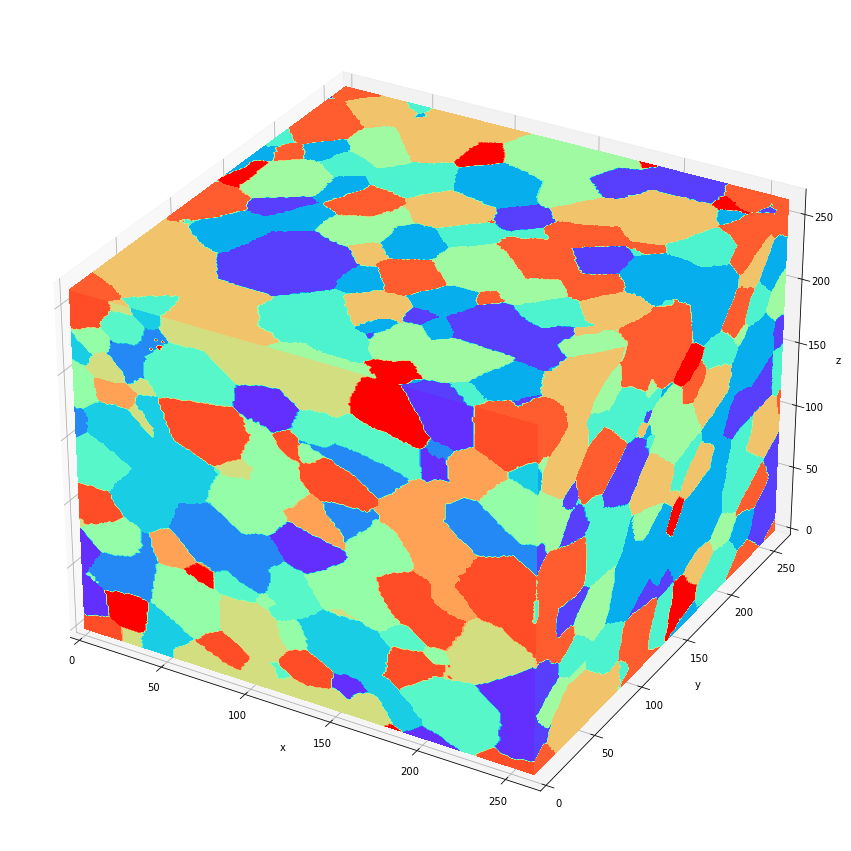

<Figure size 432x288 with 0 Axes>

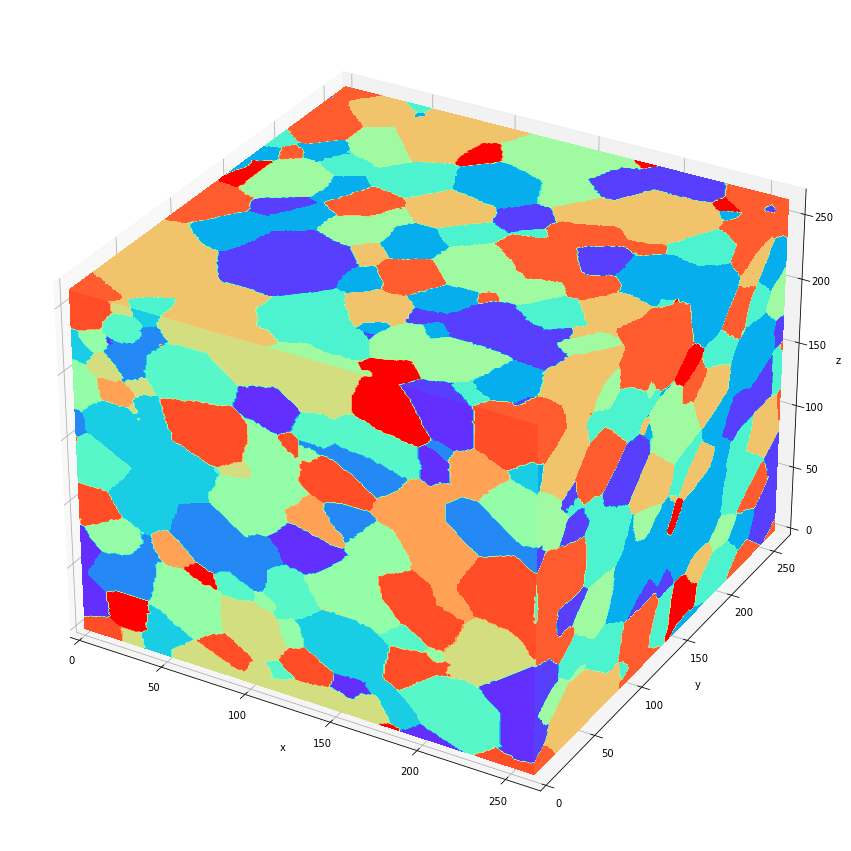

<Figure size 432x288 with 0 Axes>

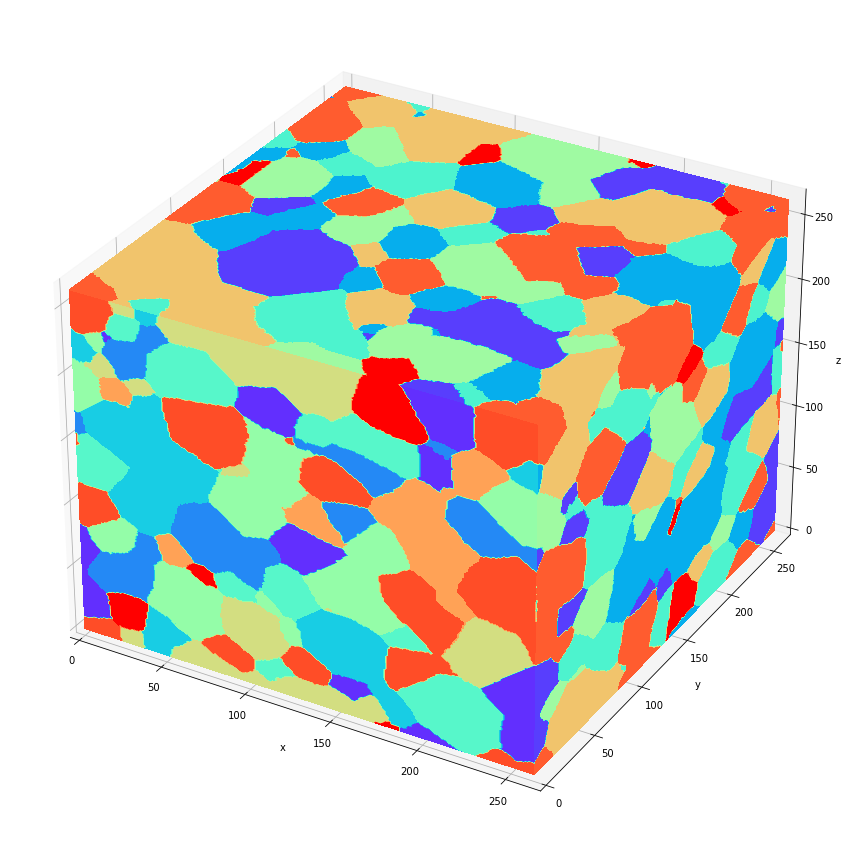

<Figure size 432x288 with 0 Axes>

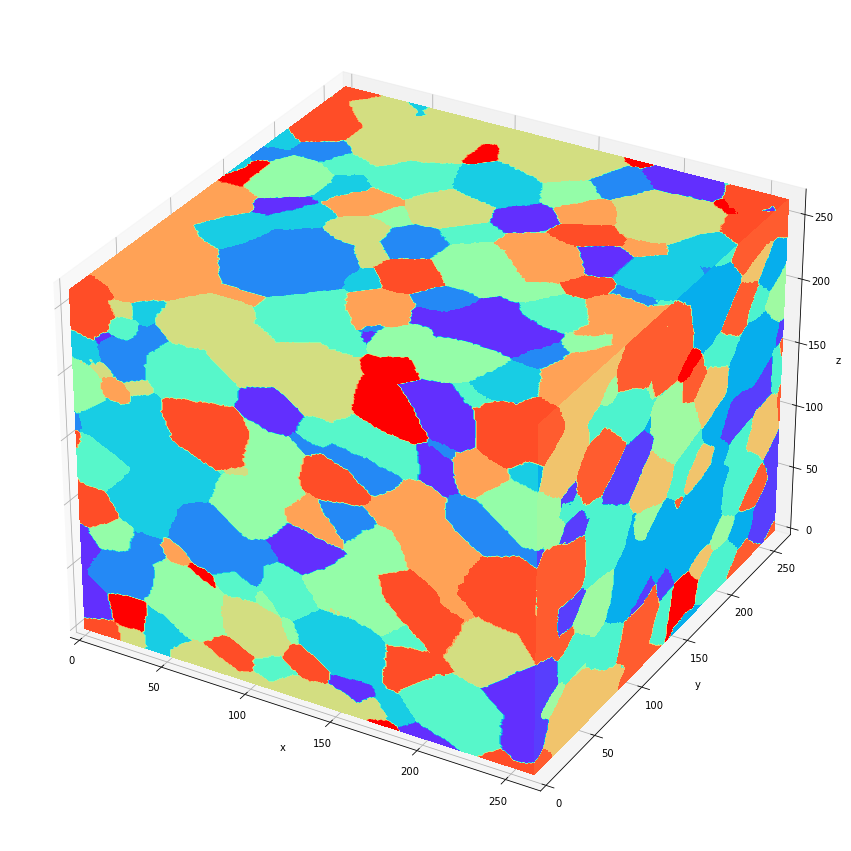

<Figure size 432x288 with 0 Axes>

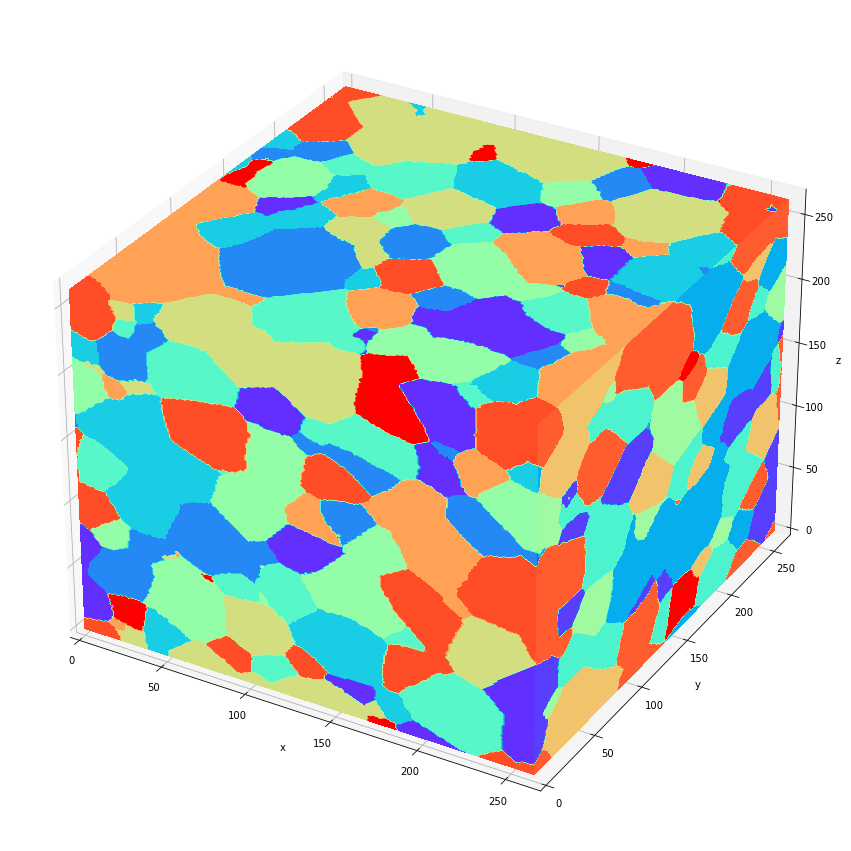

<Figure size 432x288 with 0 Axes>

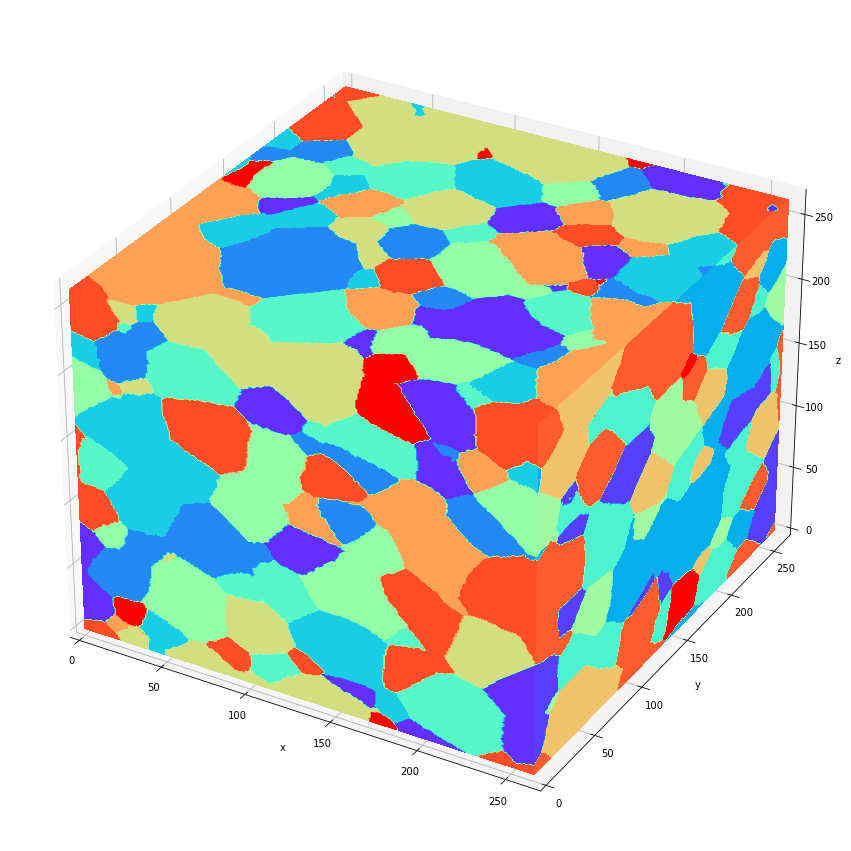

<Figure size 432x288 with 0 Axes>

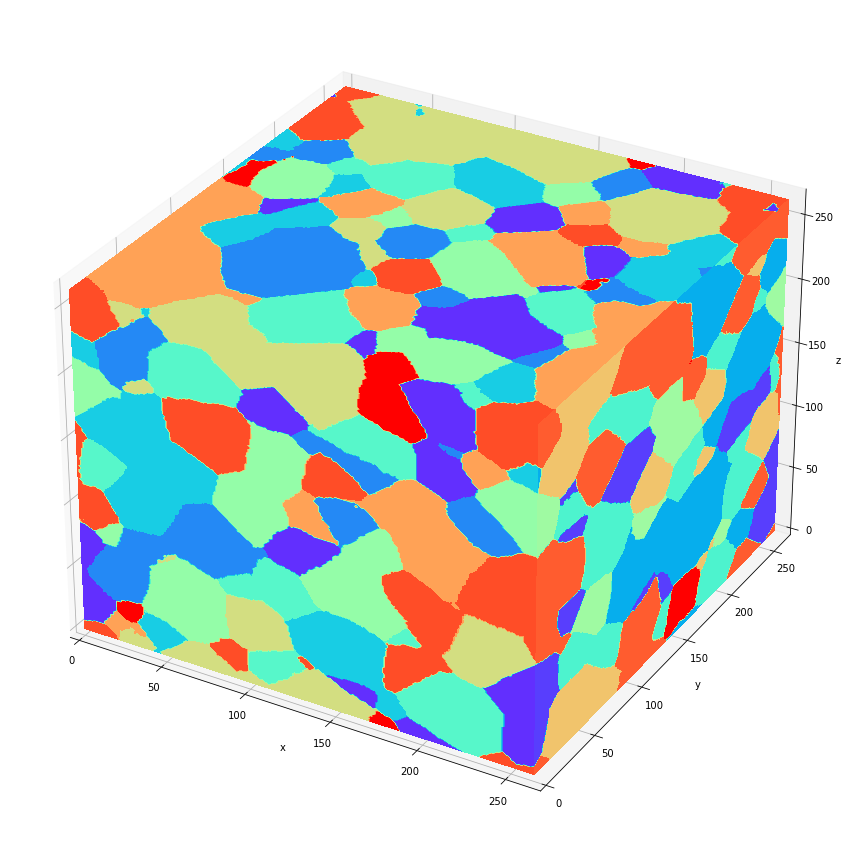

<Figure size 432x288 with 0 Axes>

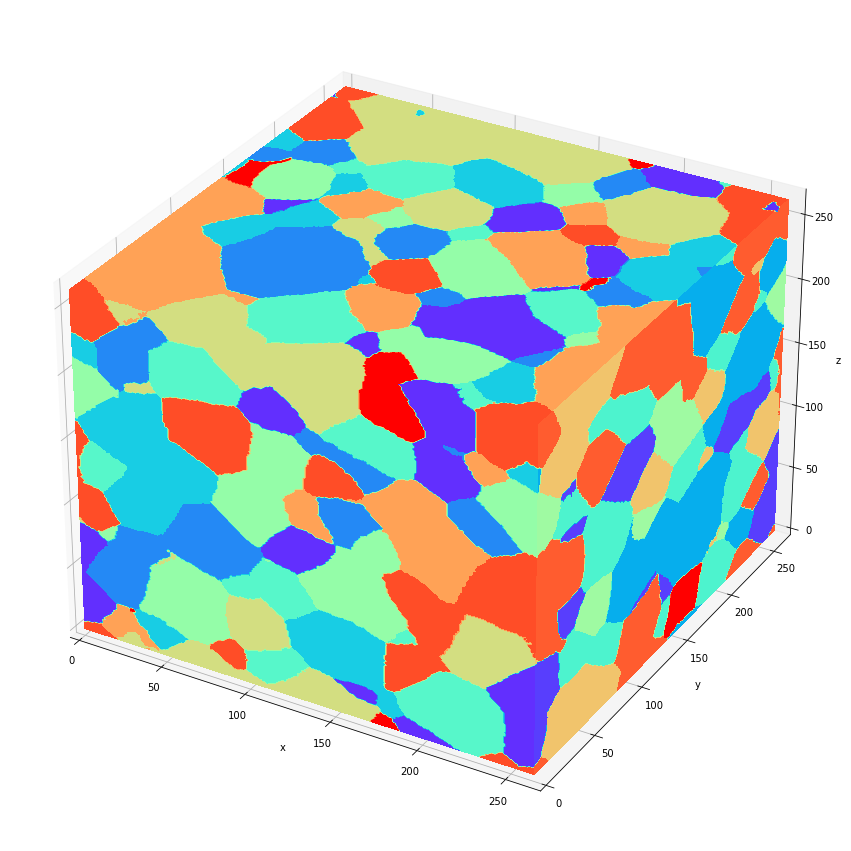

<Figure size 432x288 with 0 Axes>

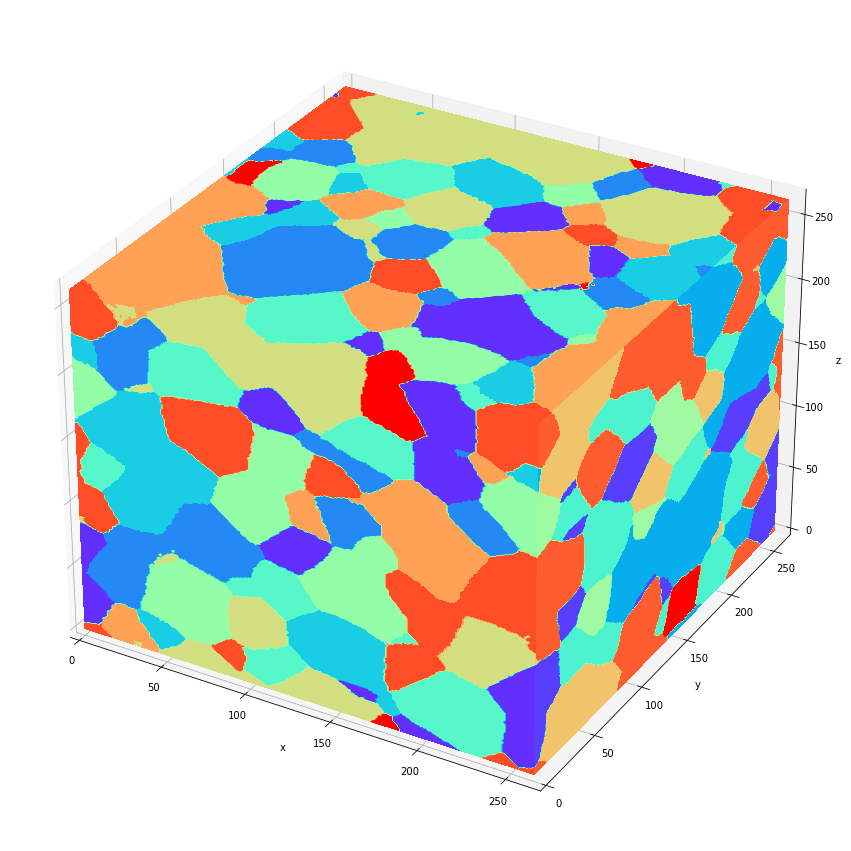

<Figure size 432x288 with 0 Axes>

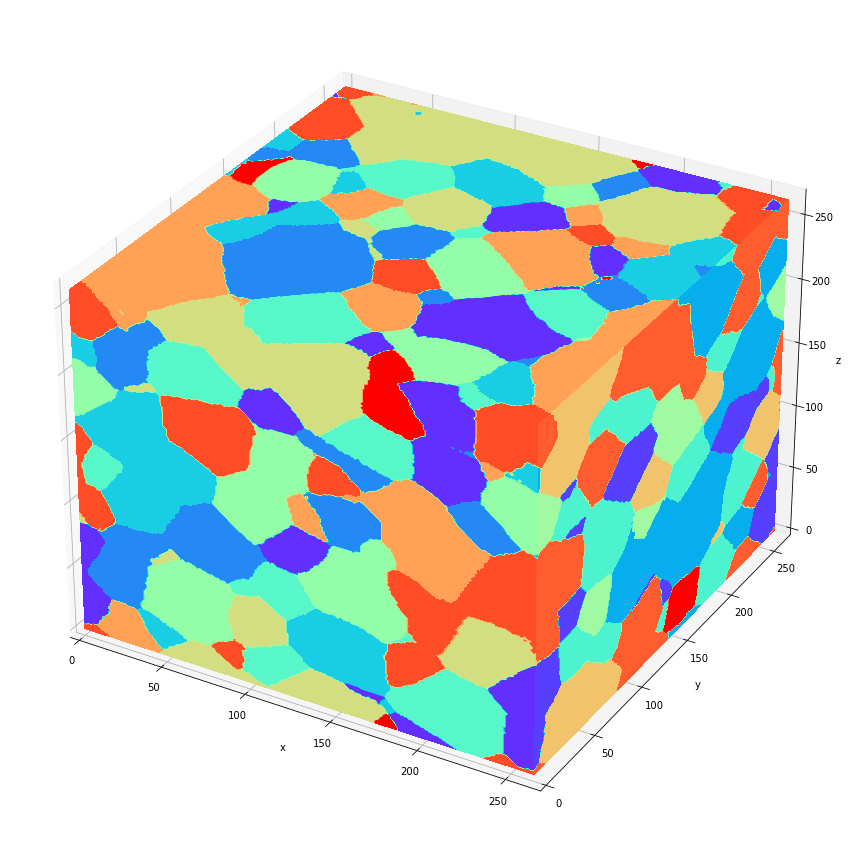

<Figure size 432x288 with 0 Axes>

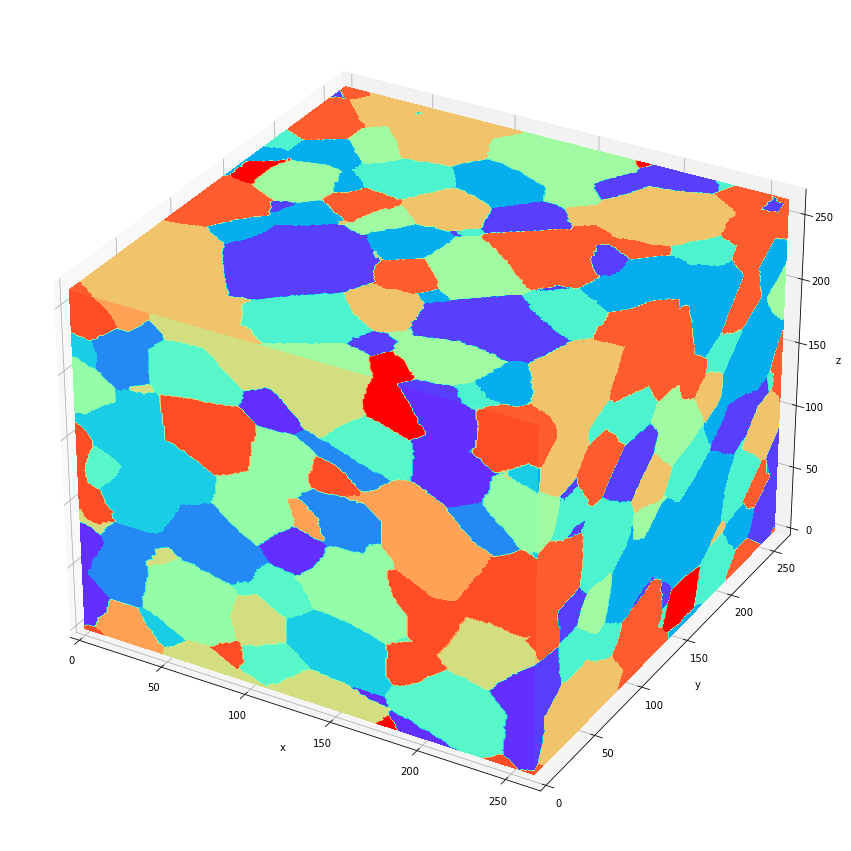

<Figure size 432x288 with 0 Axes>

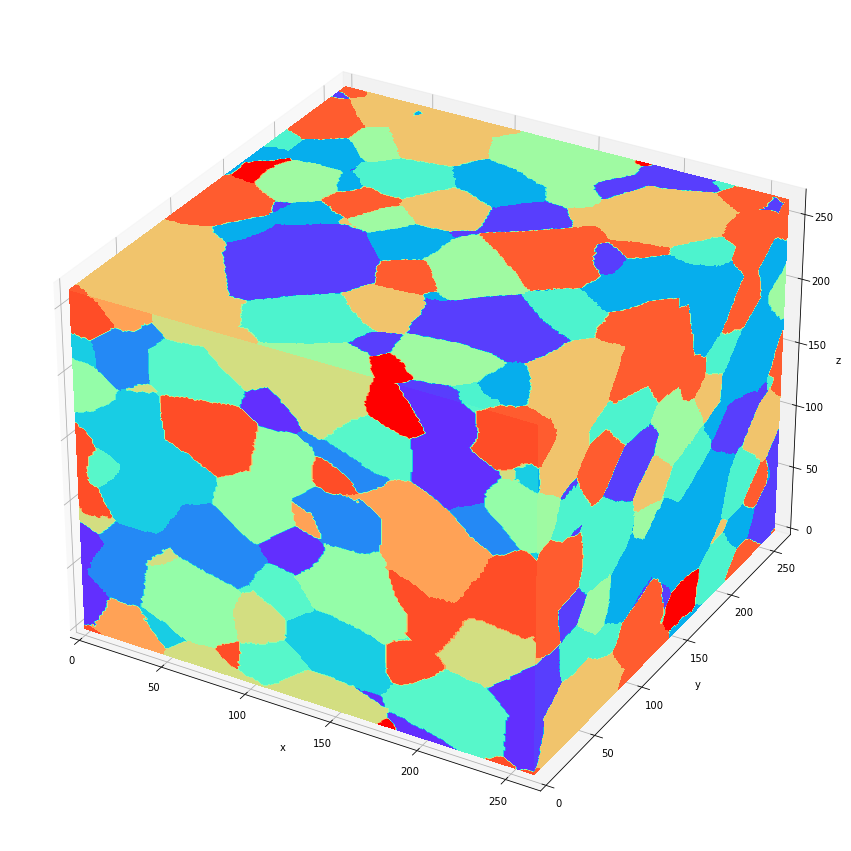

<Figure size 432x288 with 0 Axes>

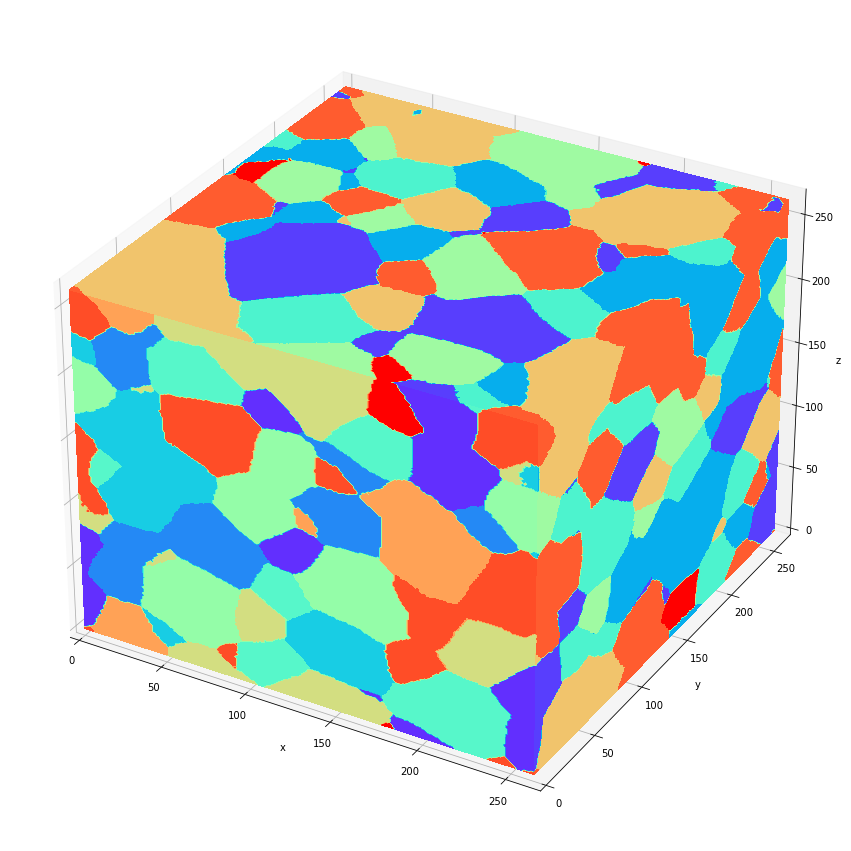

<Figure size 432x288 with 0 Axes>

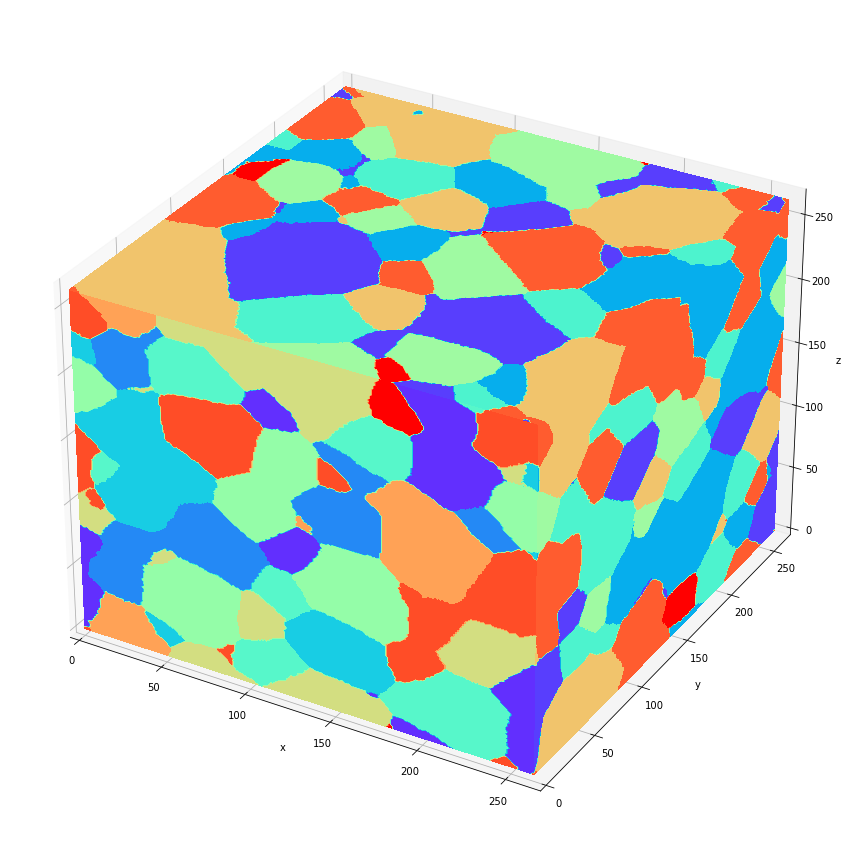

<Figure size 432x288 with 0 Axes>

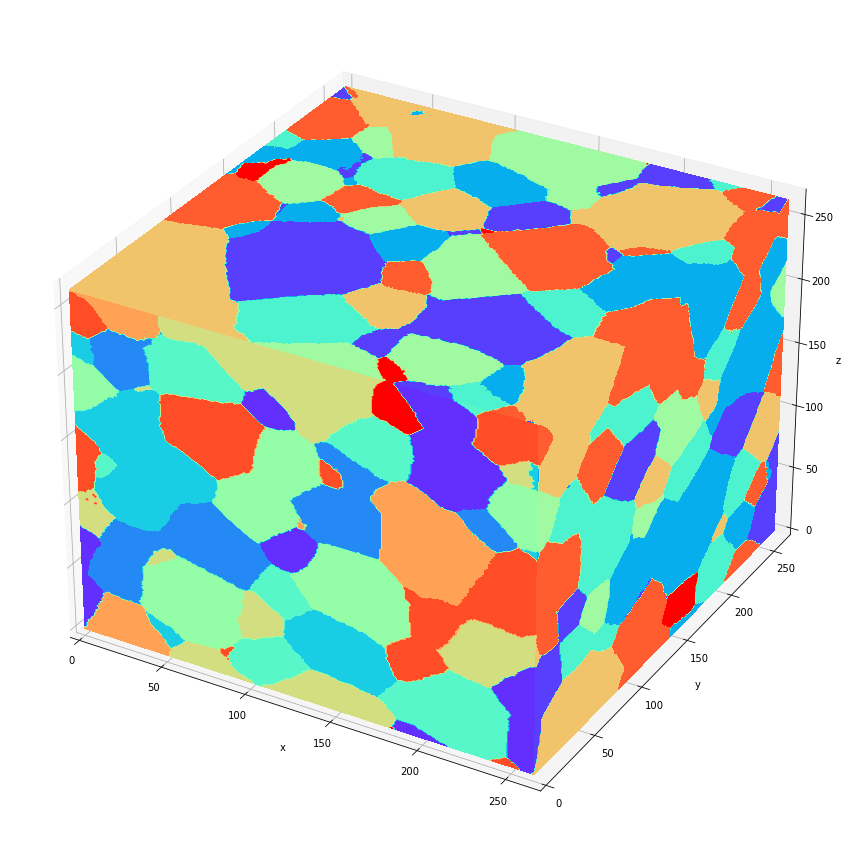

<Figure size 432x288 with 0 Axes>

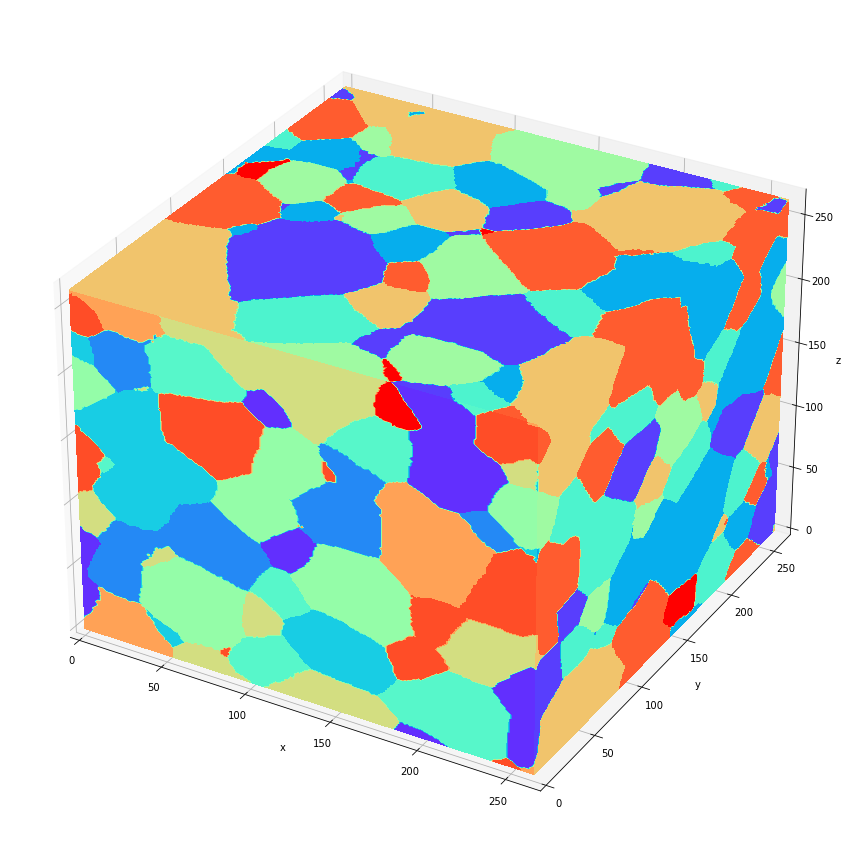

<Figure size 432x288 with 0 Axes>

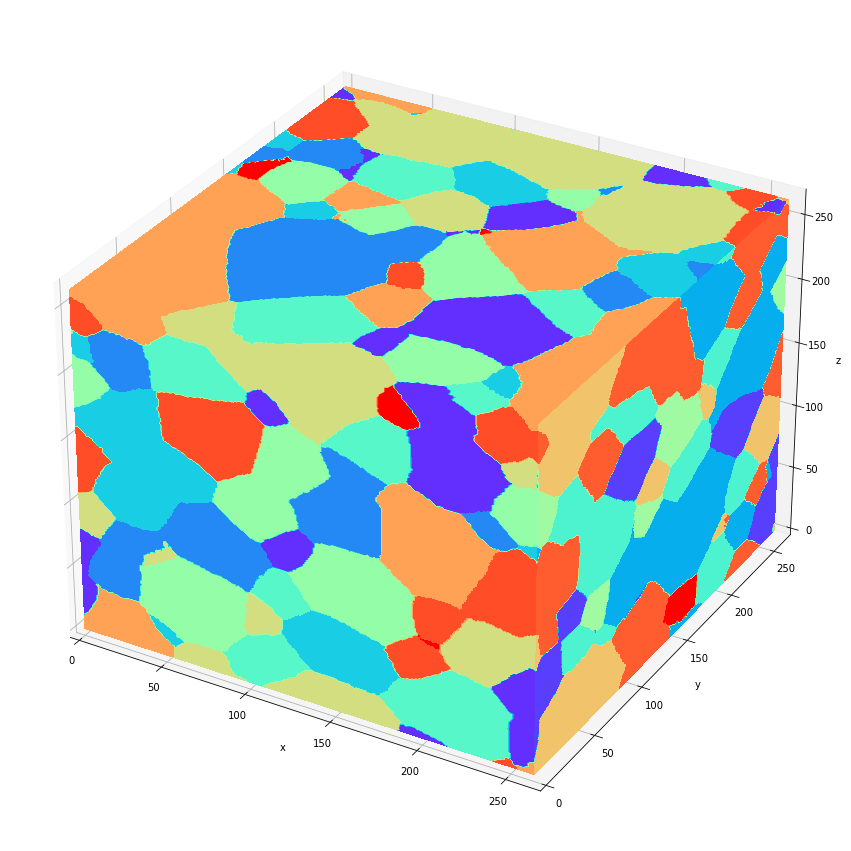

<Figure size 432x288 with 0 Axes>

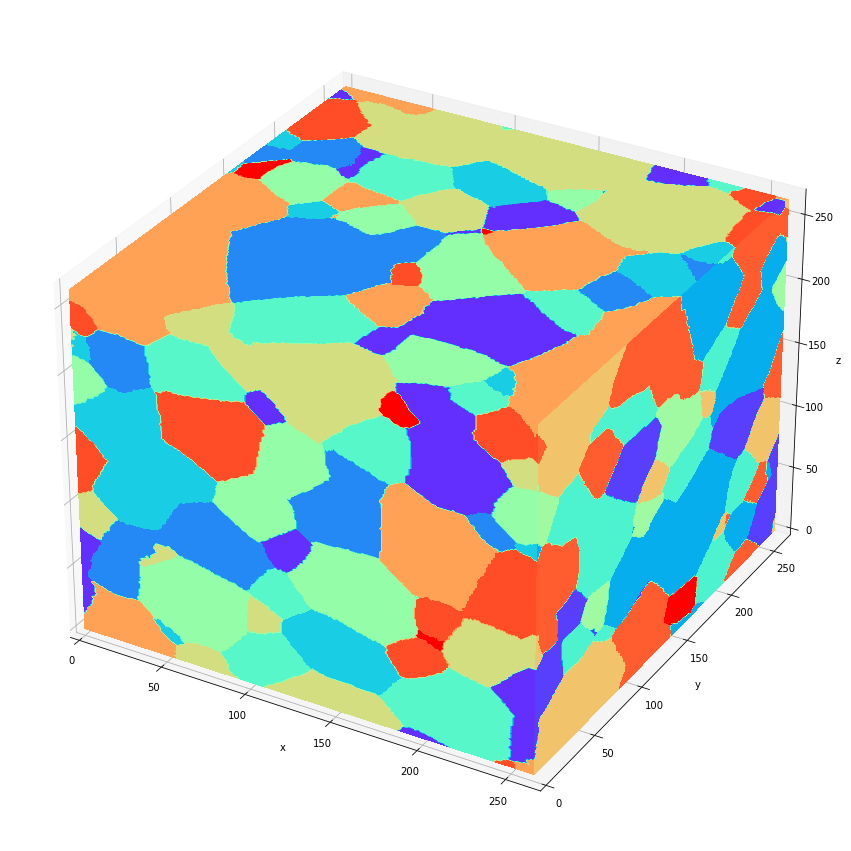

<Figure size 432x288 with 0 Axes>

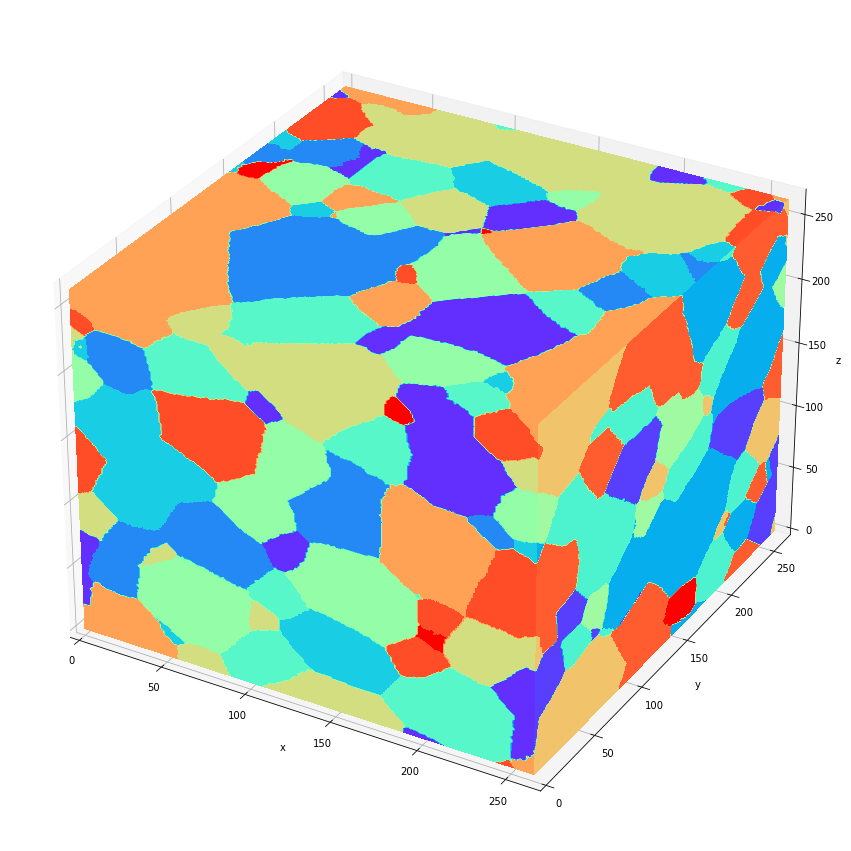

<Figure size 432x288 with 0 Axes>

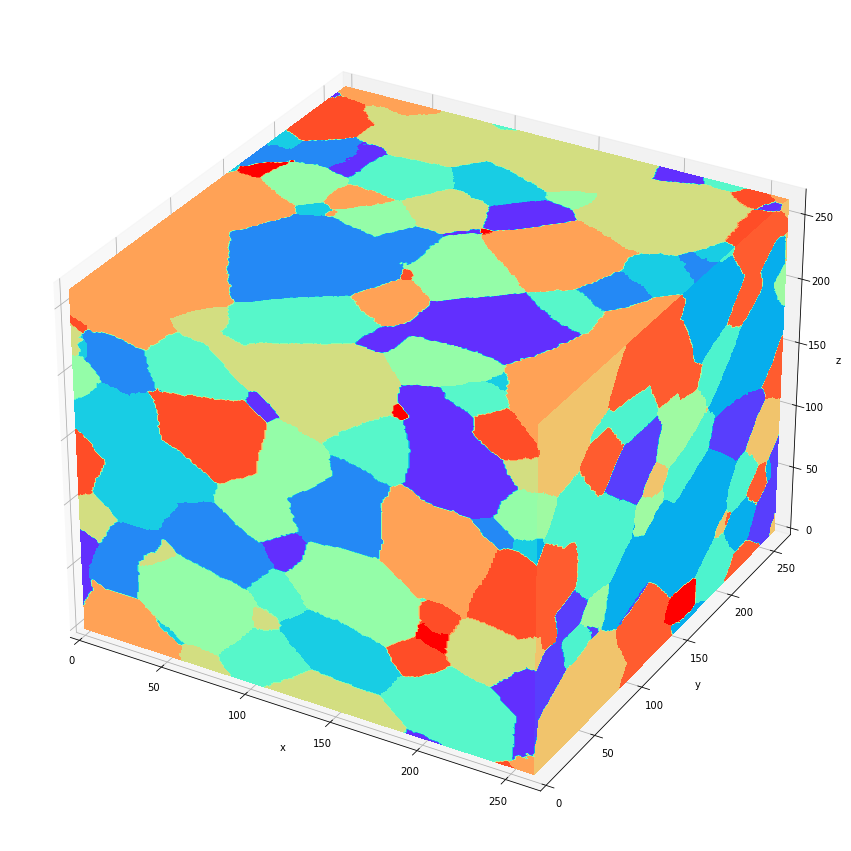

<Figure size 432x288 with 0 Axes>

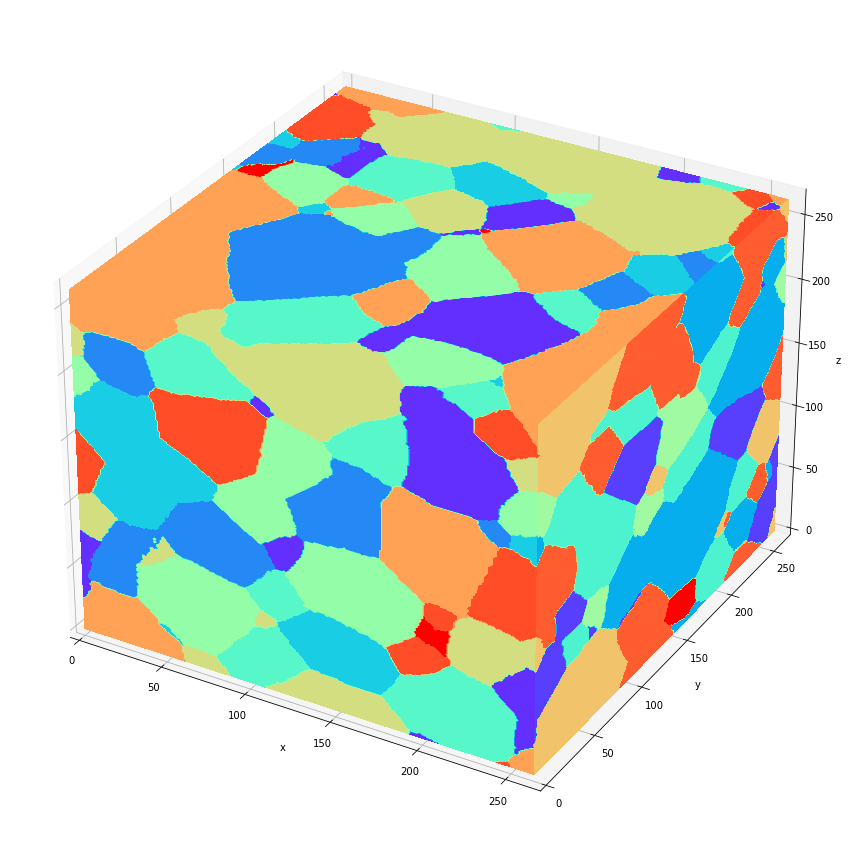

<Figure size 432x288 with 0 Axes>

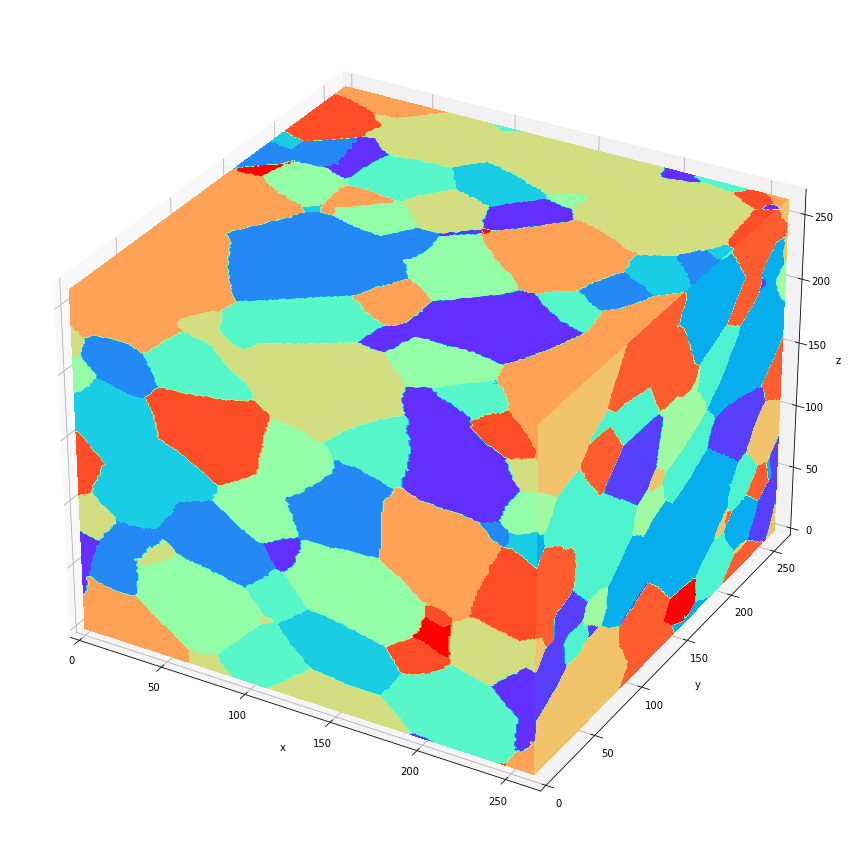

<Figure size 432x288 with 0 Axes>

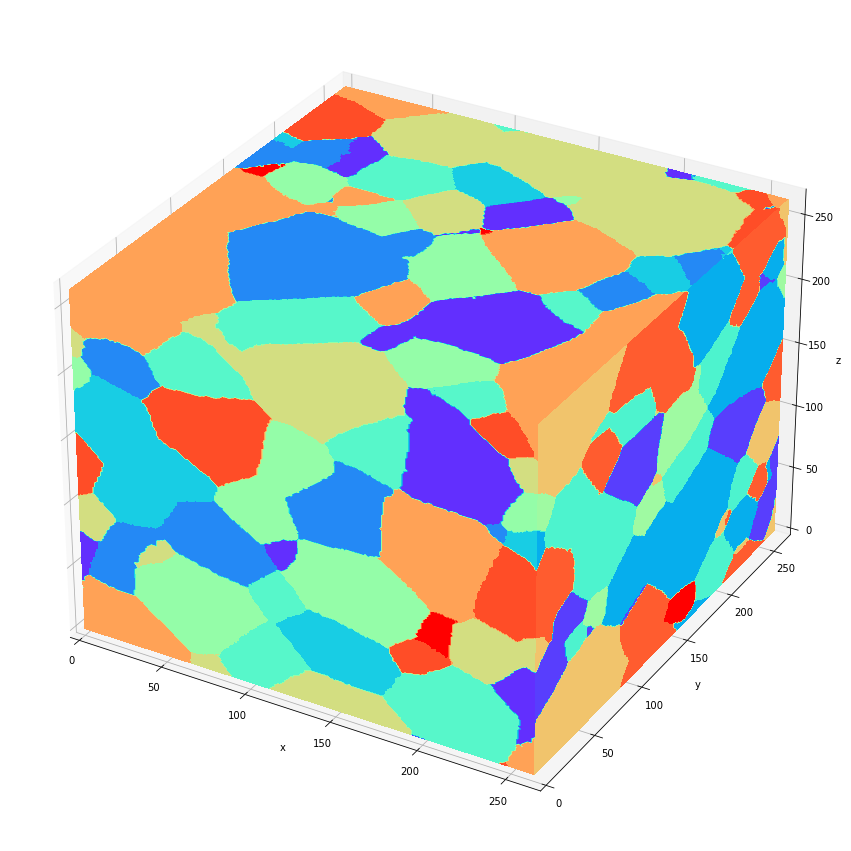

<Figure size 432x288 with 0 Axes>

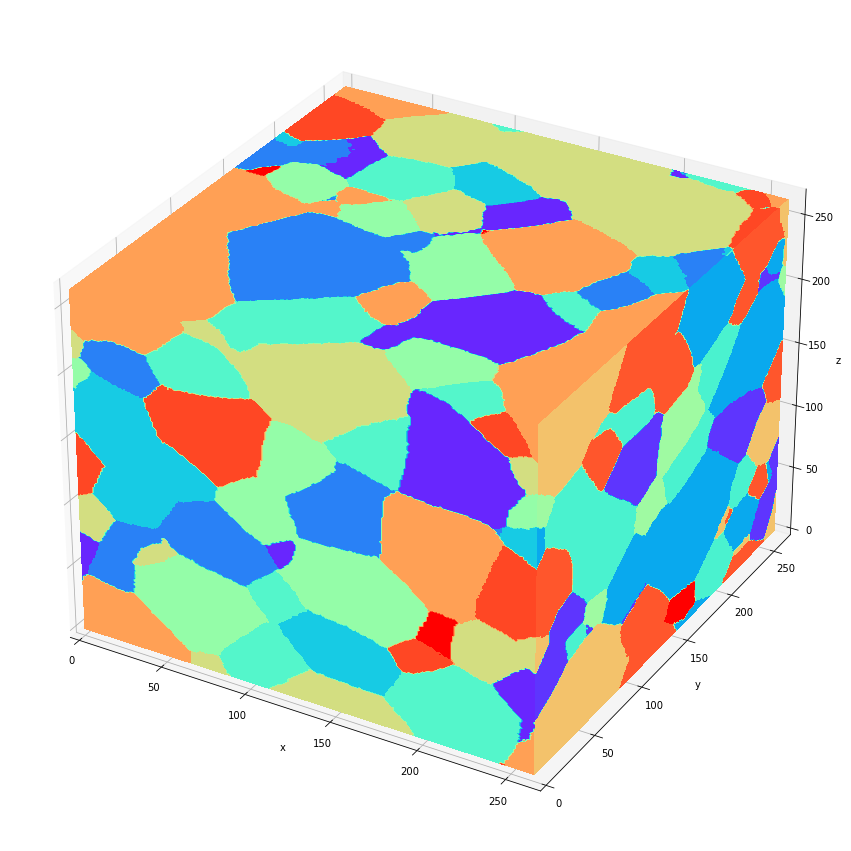

<Figure size 432x288 with 0 Axes>

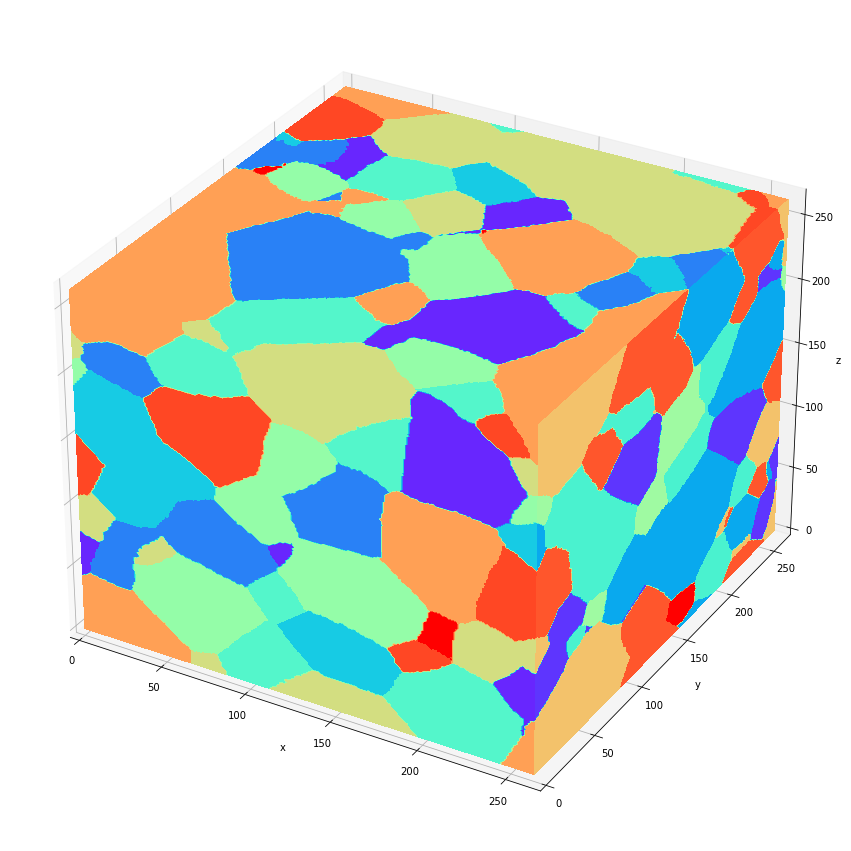

<Figure size 432x288 with 0 Axes>

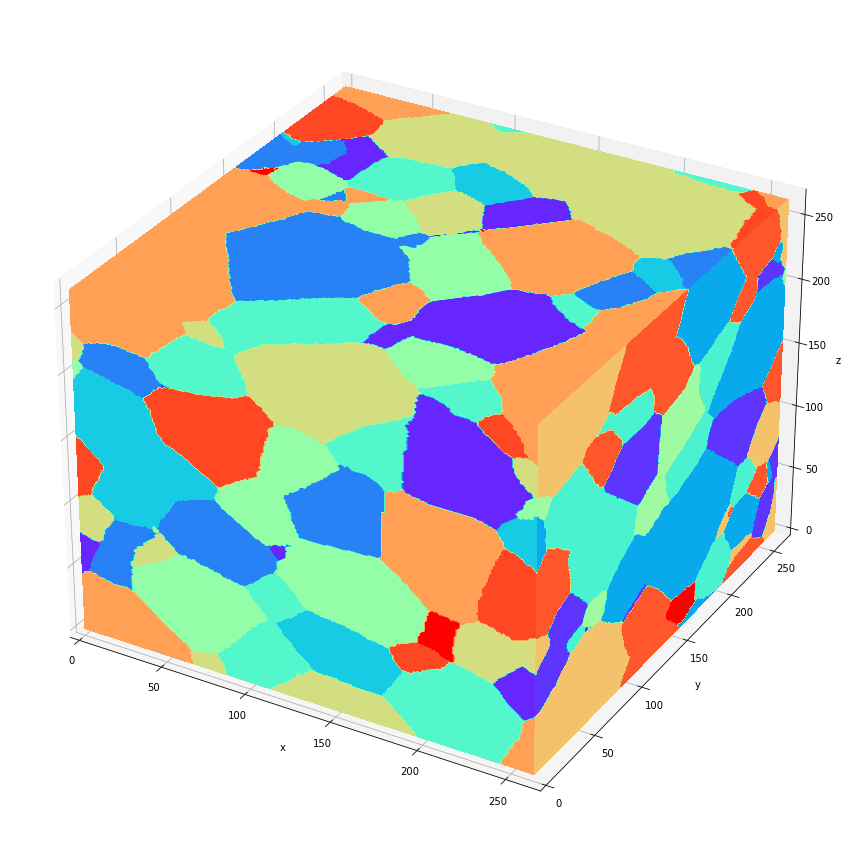

<Figure size 432x288 with 0 Axes>

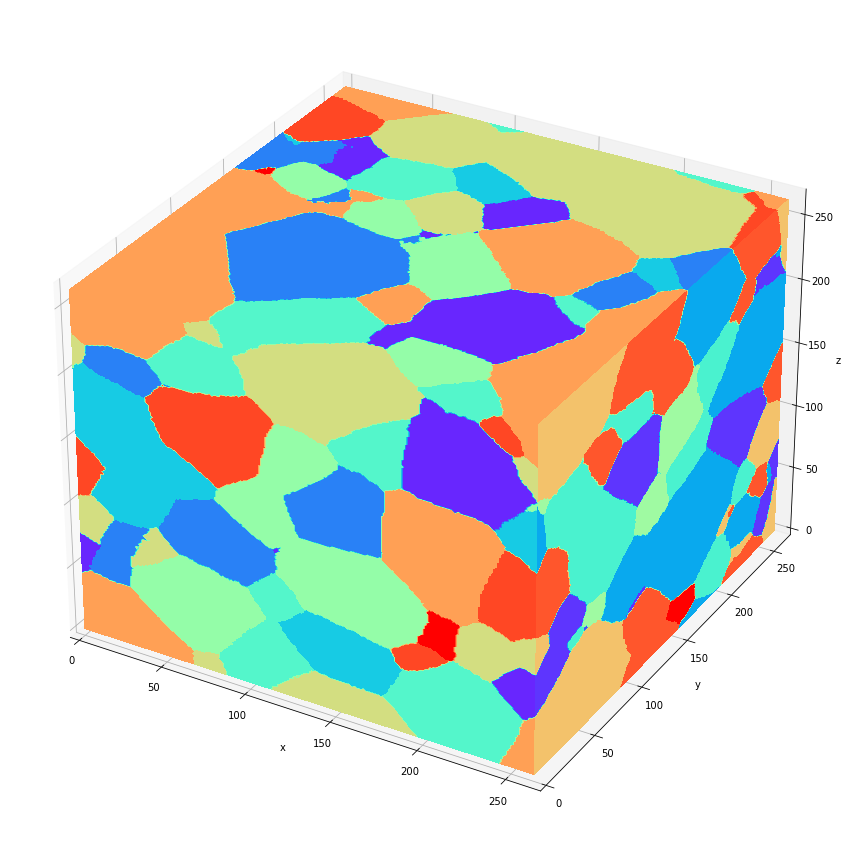

<Figure size 432x288 with 0 Axes>

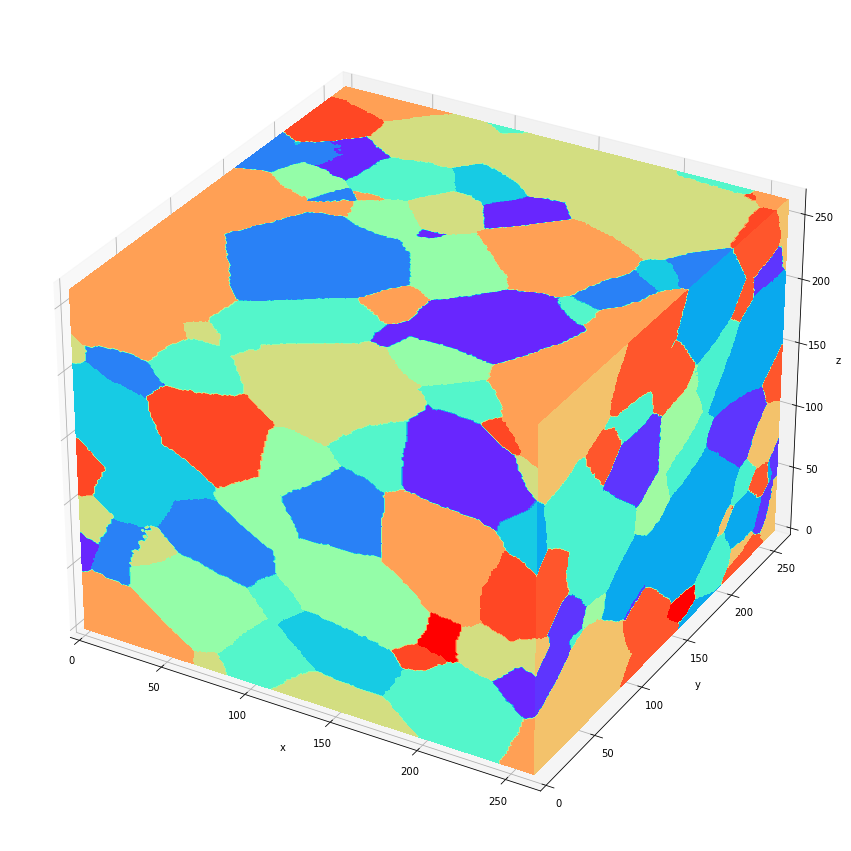

<Figure size 432x288 with 0 Axes>

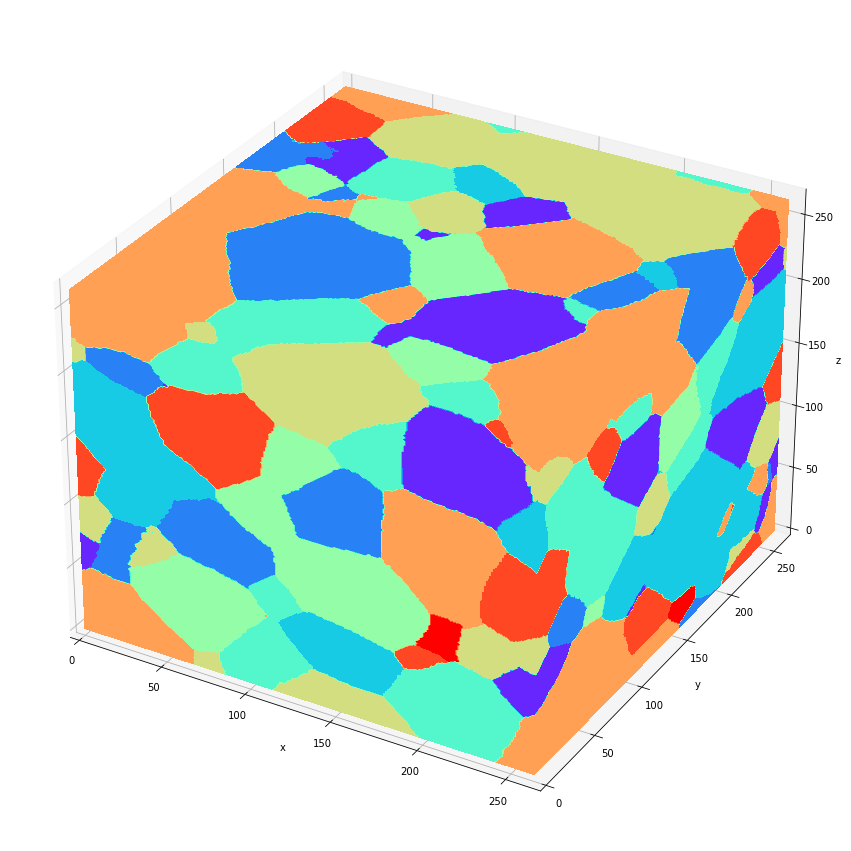

<Figure size 432x288 with 0 Axes>

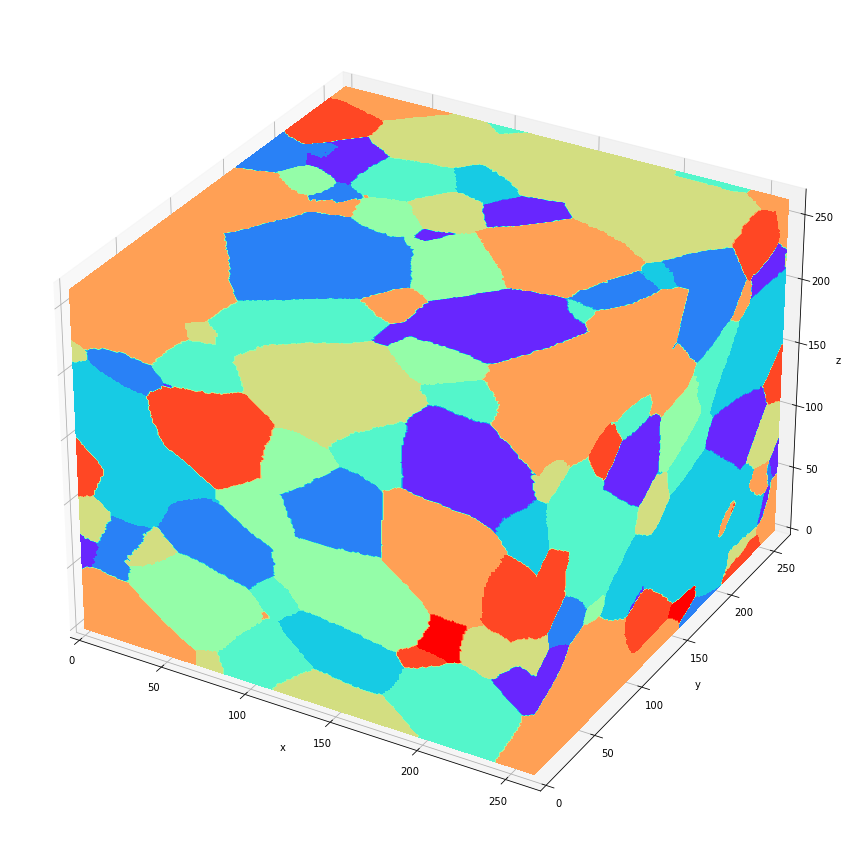

<Figure size 432x288 with 0 Axes>

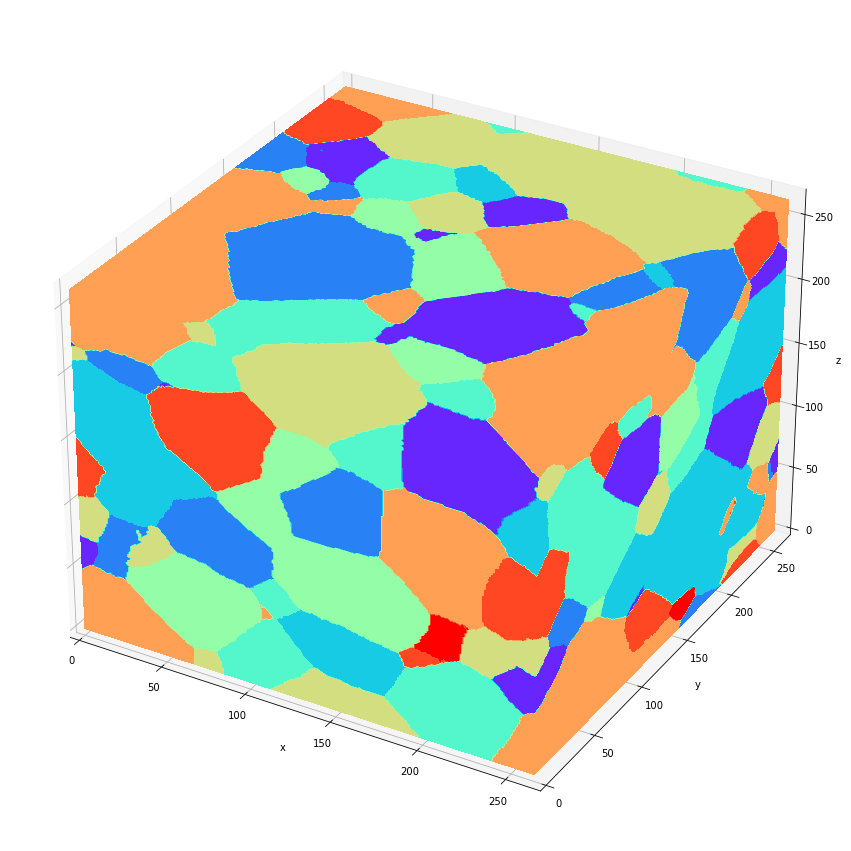

<Figure size 432x288 with 0 Axes>

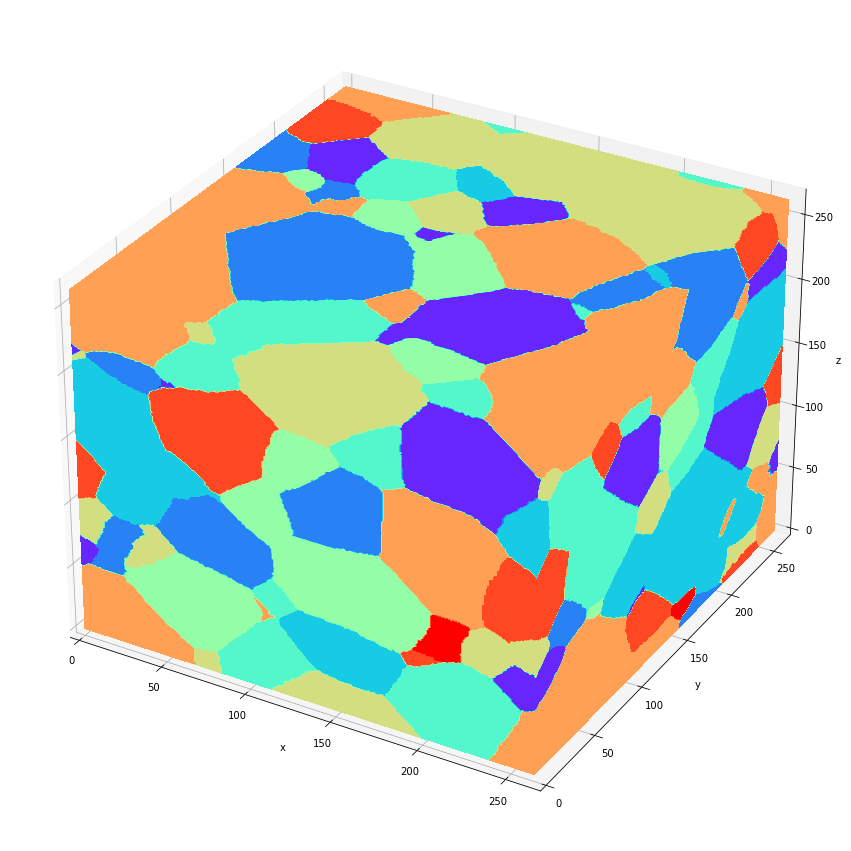

<Figure size 432x288 with 0 Axes>

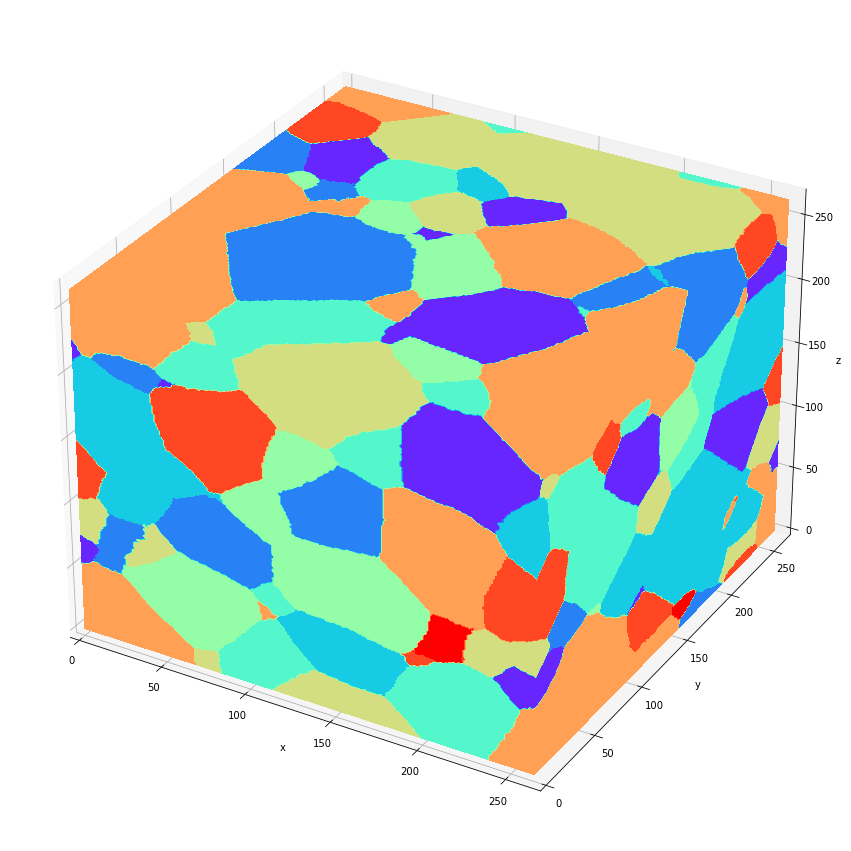

<Figure size 432x288 with 0 Axes>

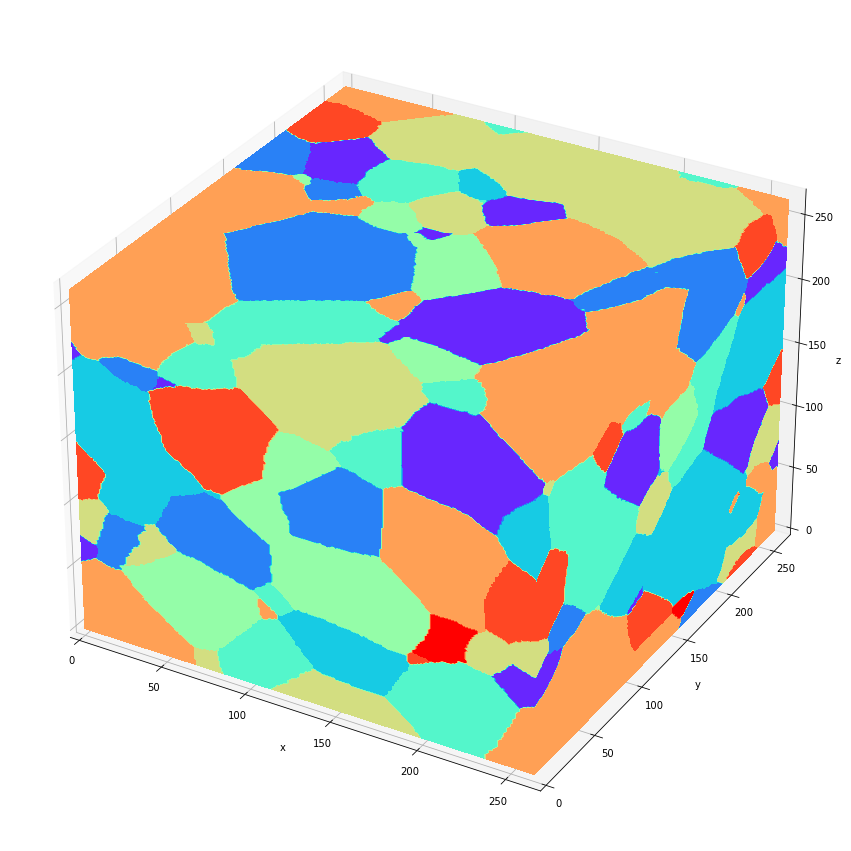

<Figure size 432x288 with 0 Axes>

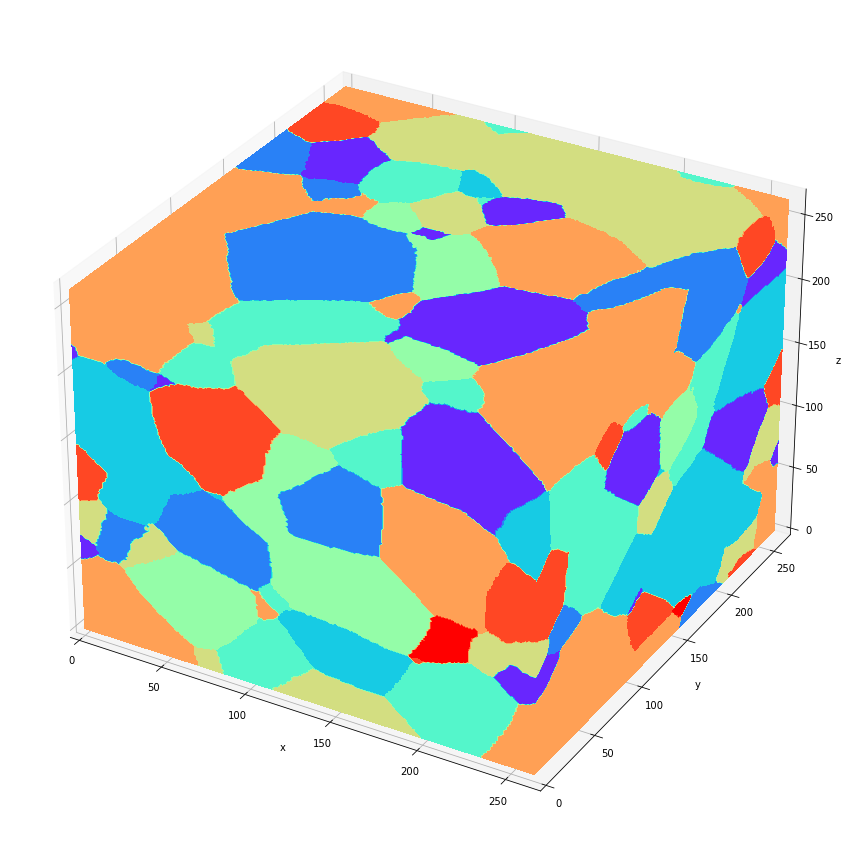

<Figure size 432x288 with 0 Axes>

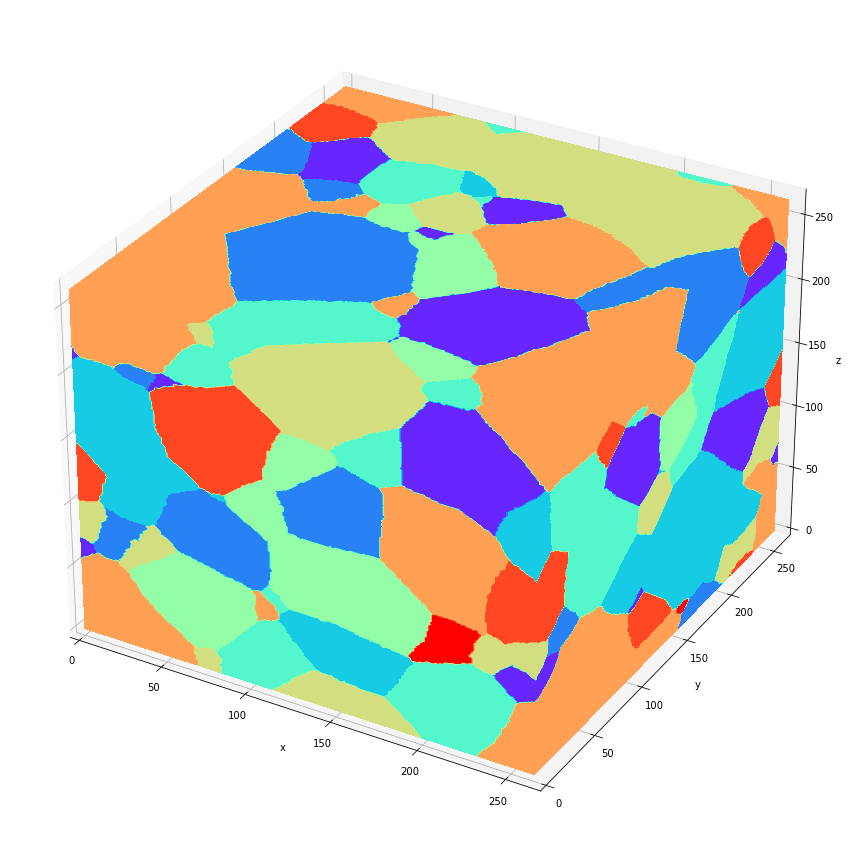

<Figure size 432x288 with 0 Axes>

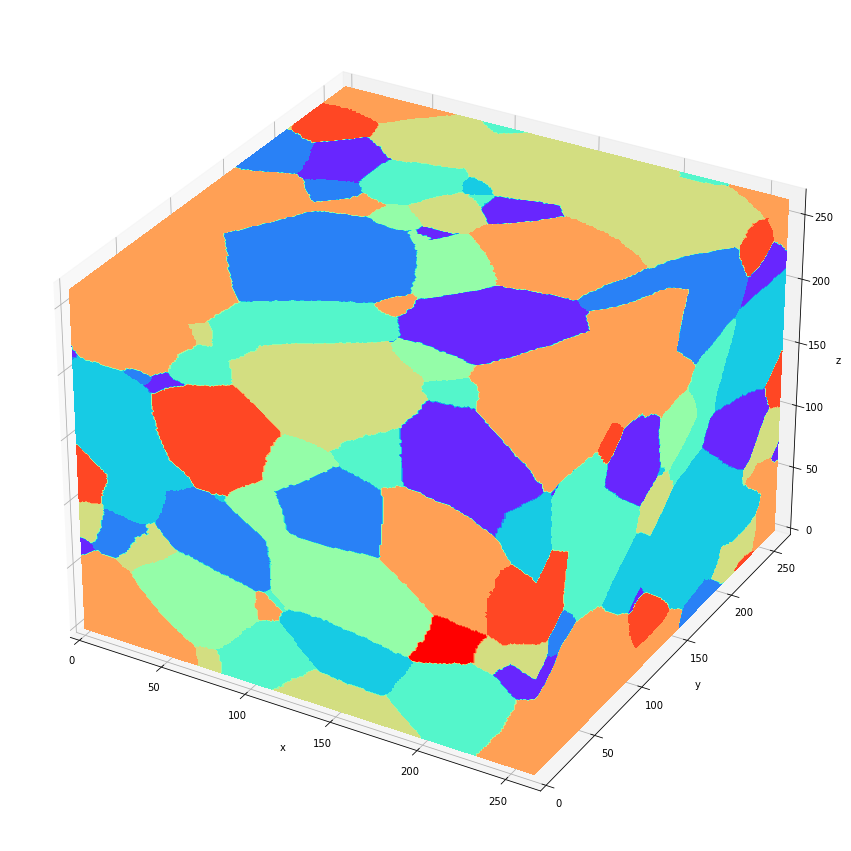

<Figure size 432x288 with 0 Axes>

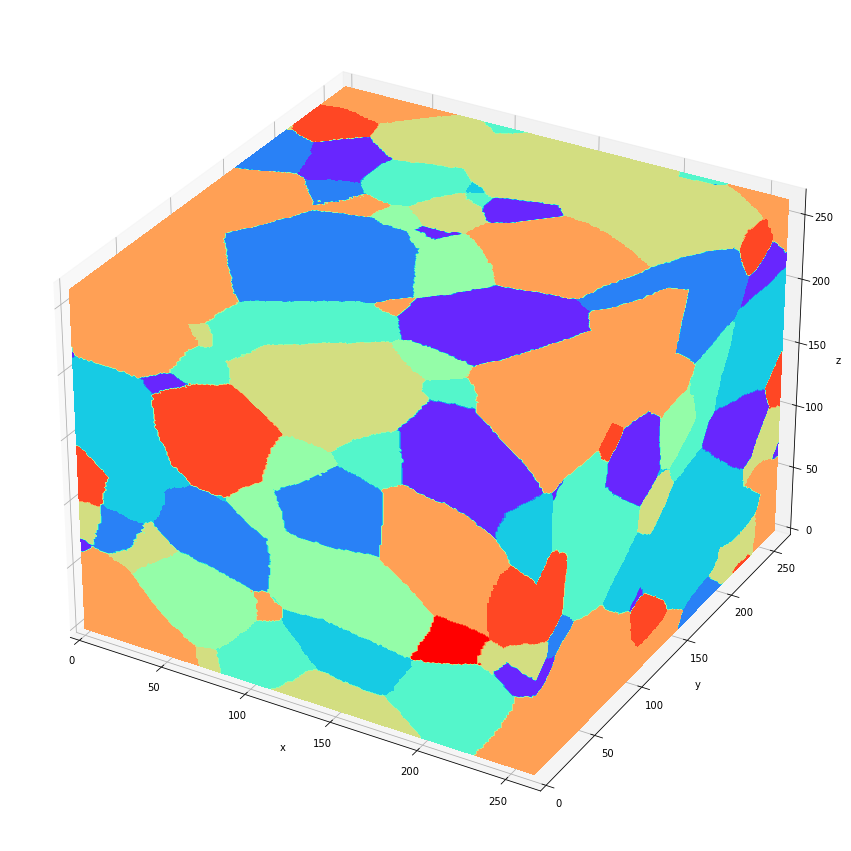

<Figure size 432x288 with 0 Axes>

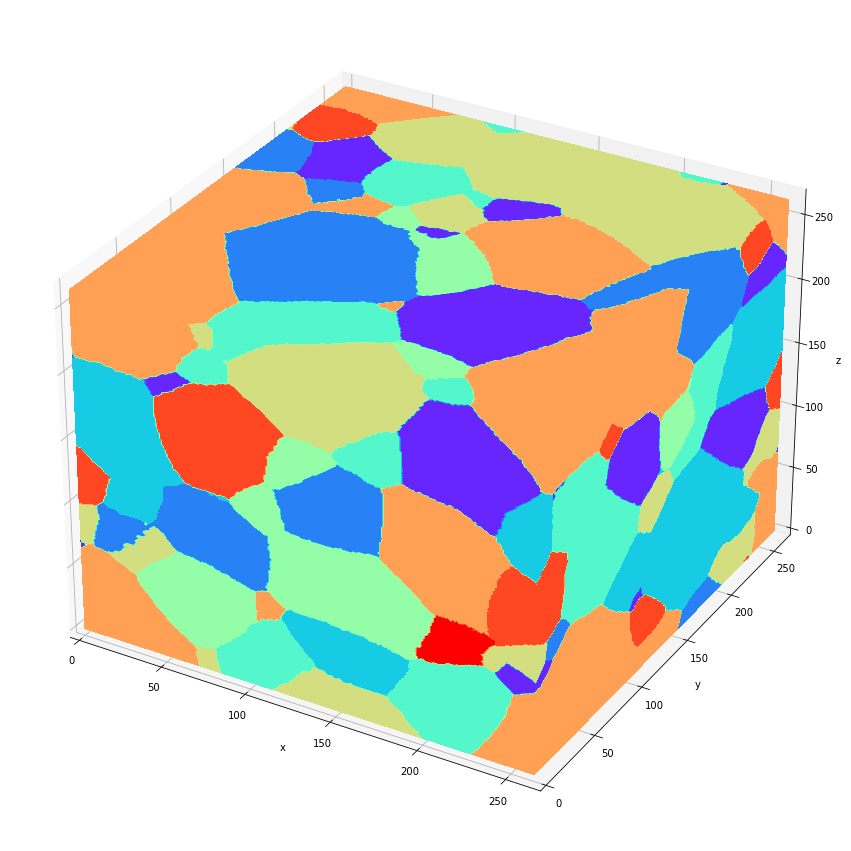

<Figure size 432x288 with 0 Axes>

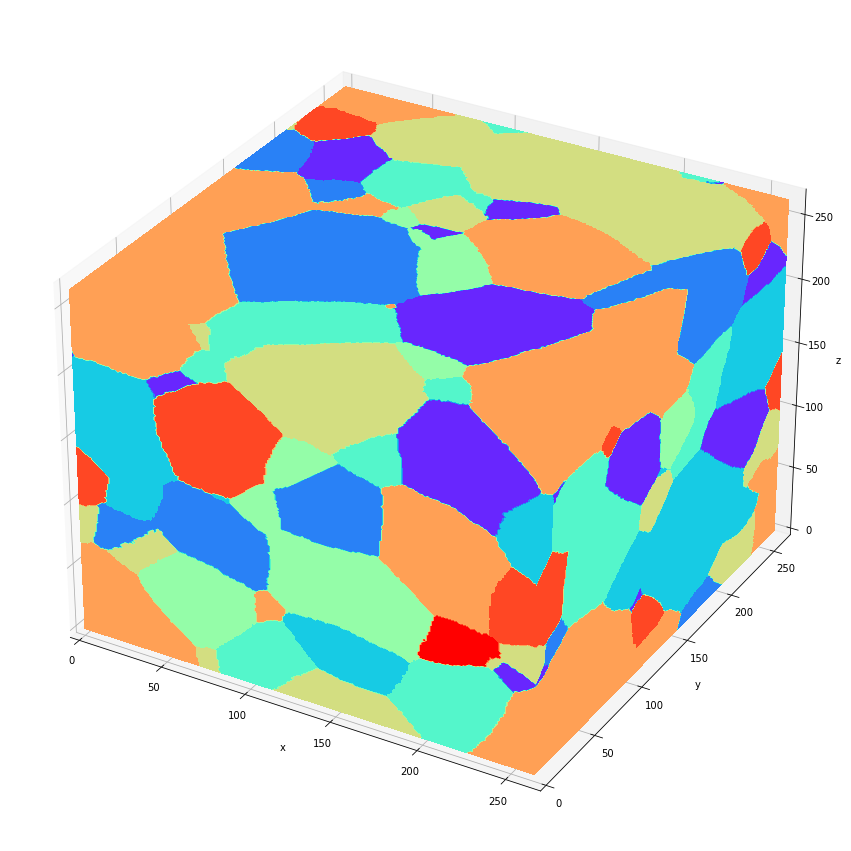

<Figure size 432x288 with 0 Axes>

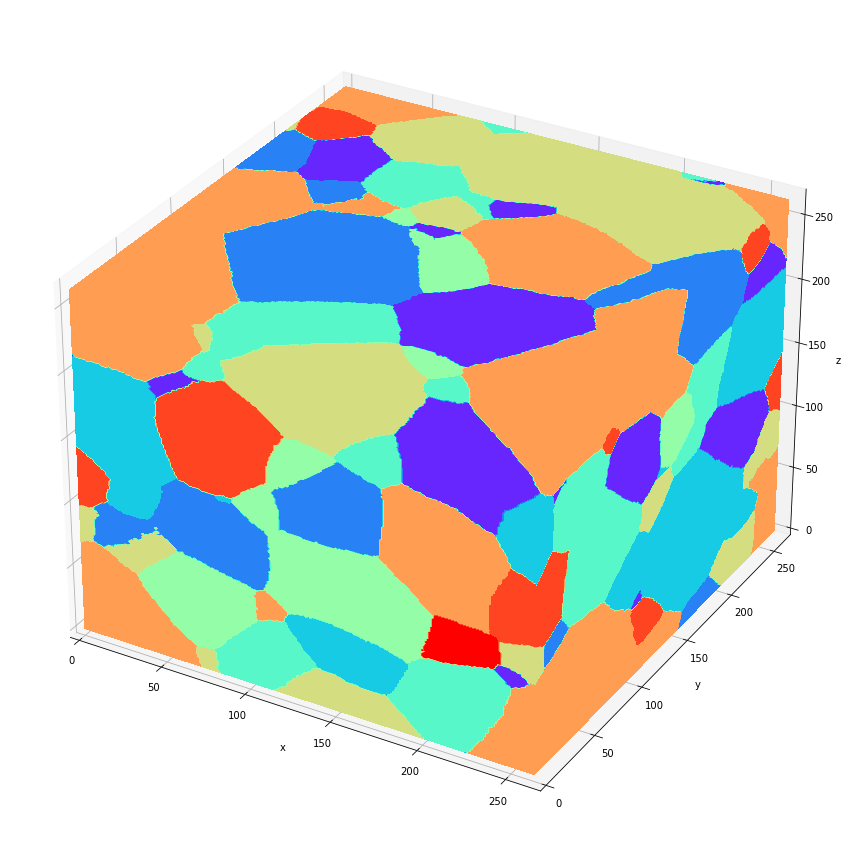

<Figure size 432x288 with 0 Axes>

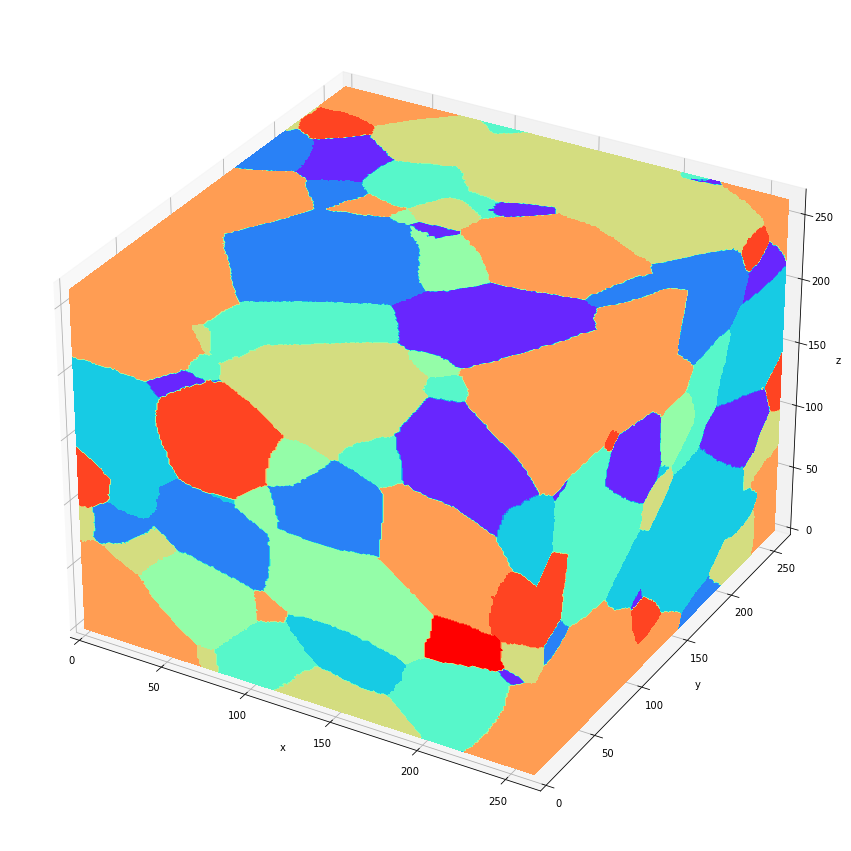

<Figure size 432x288 with 0 Axes>

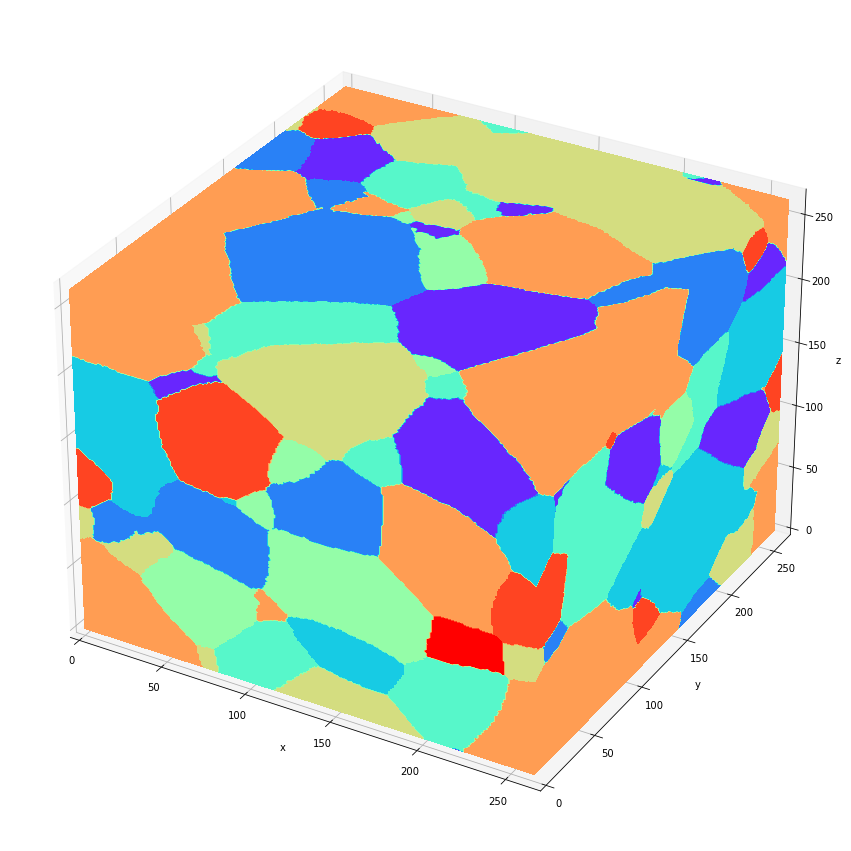

<Figure size 432x288 with 0 Axes>

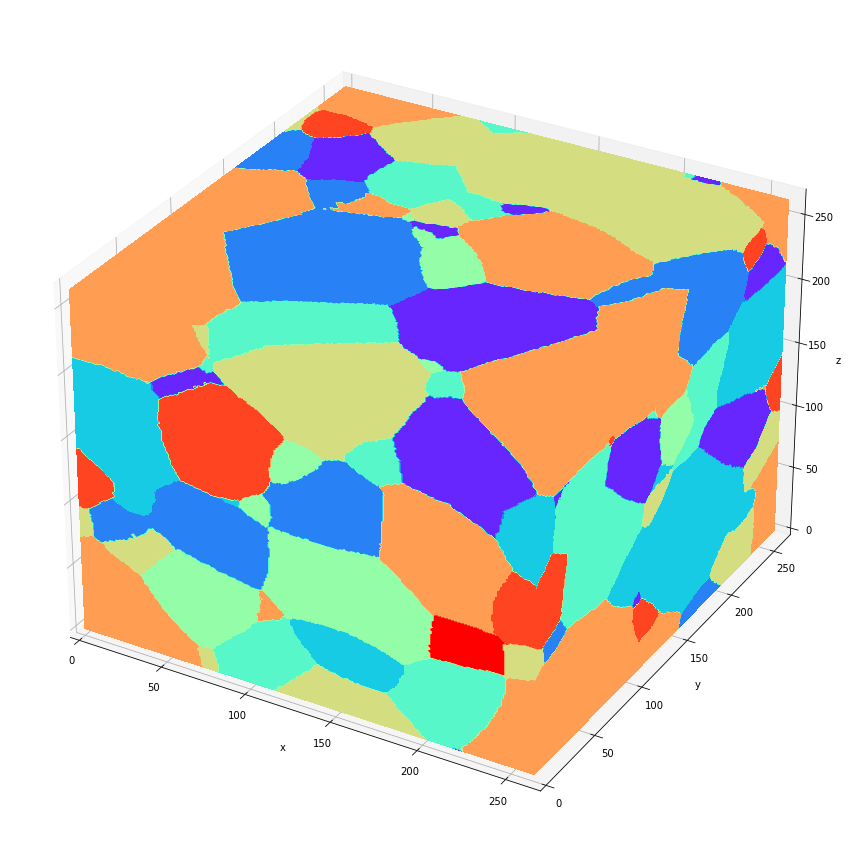

<Figure size 432x288 with 0 Axes>

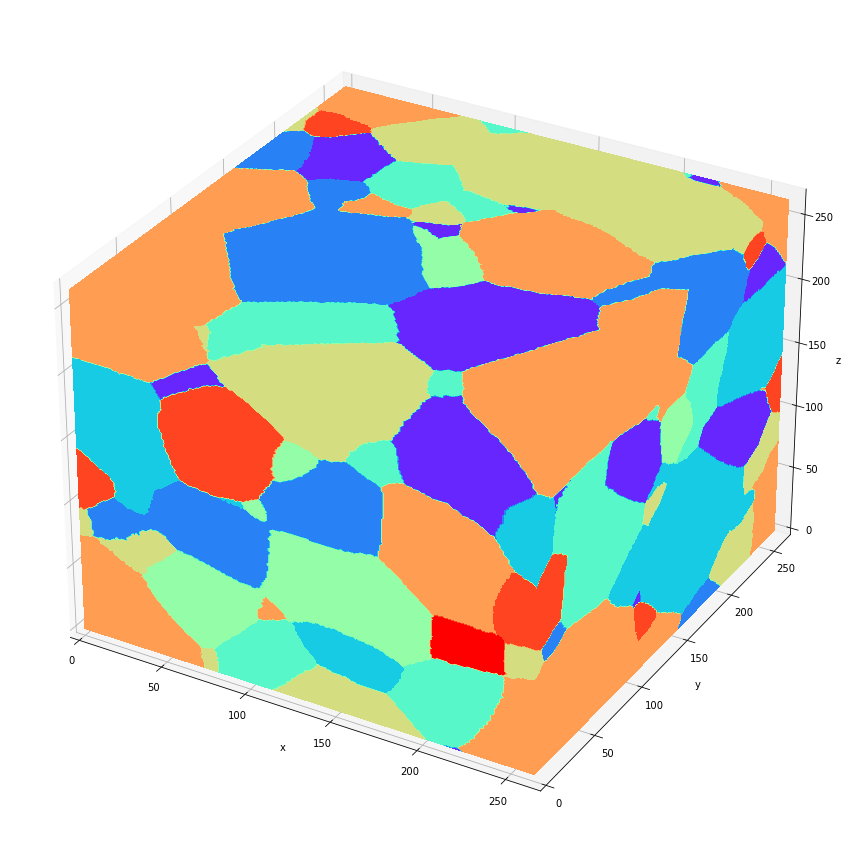

<Figure size 432x288 with 0 Axes>

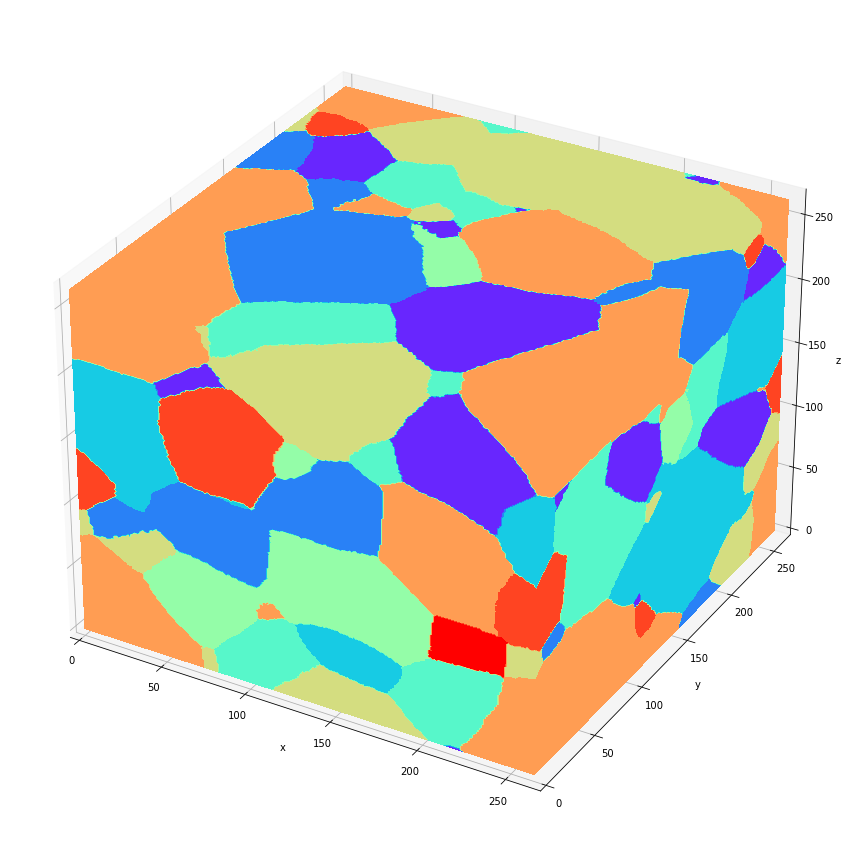

<Figure size 432x288 with 0 Axes>

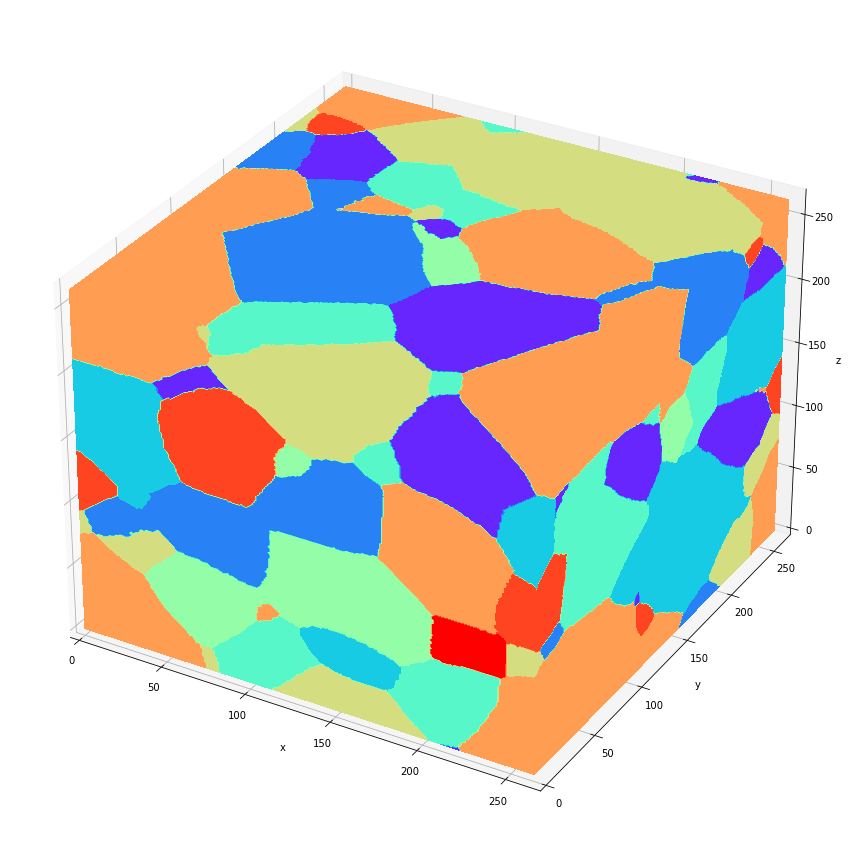

<Figure size 432x288 with 0 Axes>

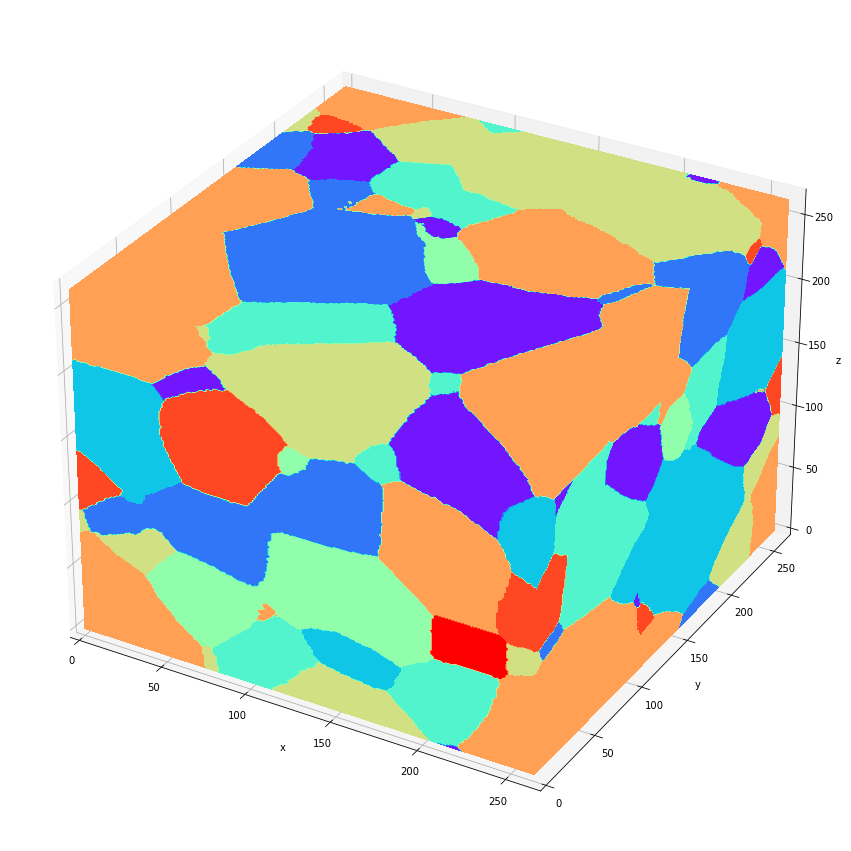

<Figure size 432x288 with 0 Axes>

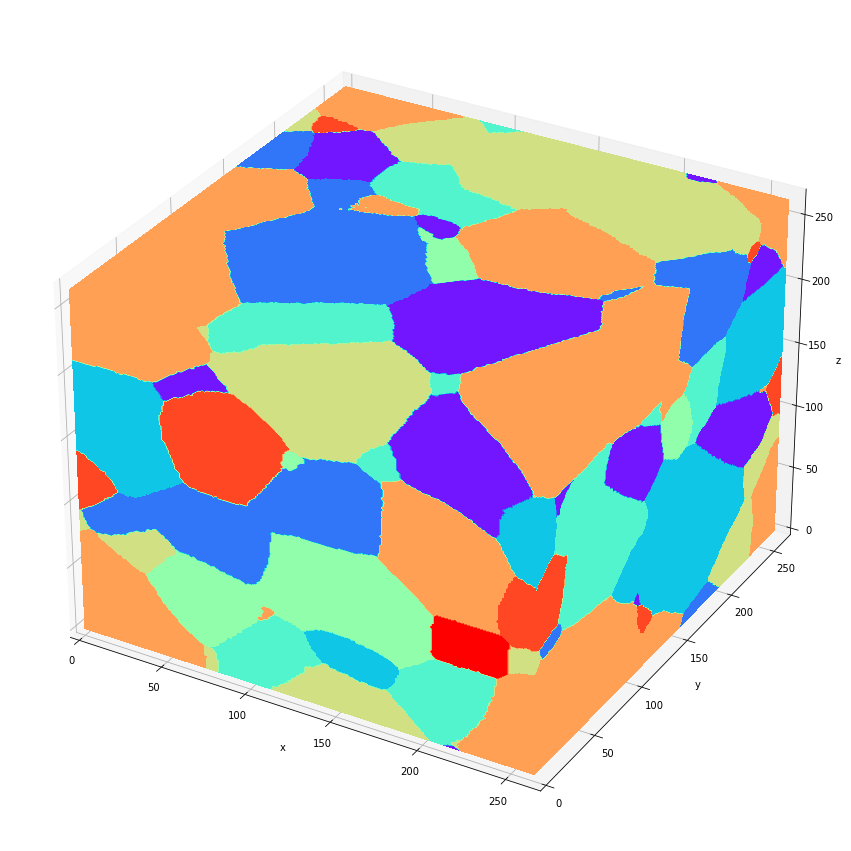

<Figure size 432x288 with 0 Axes>

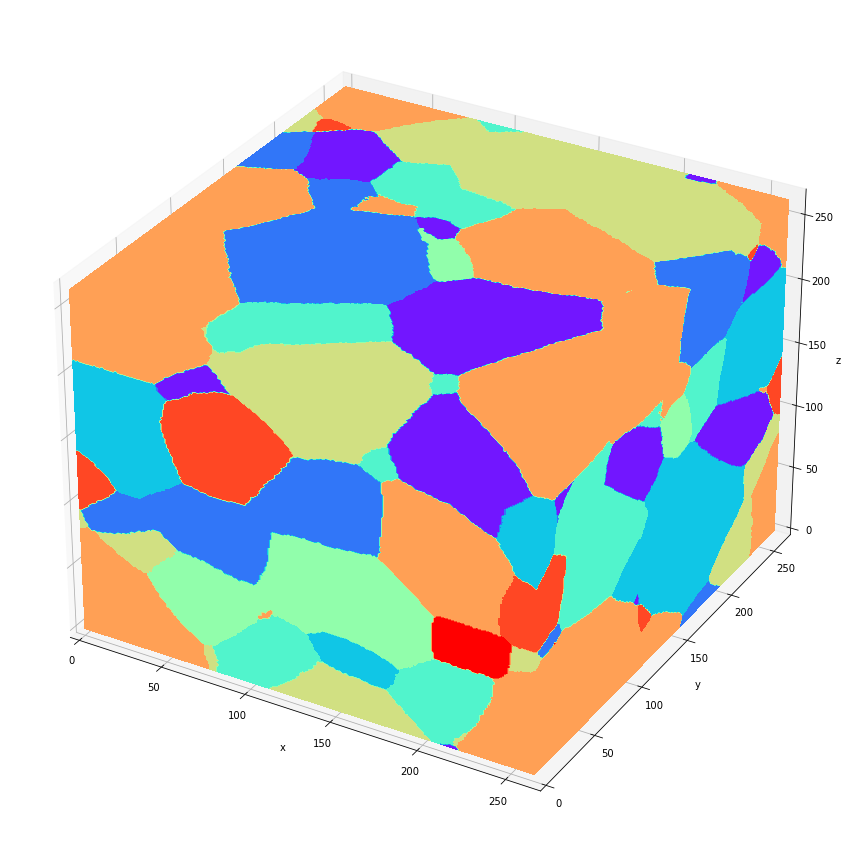

<Figure size 432x288 with 0 Axes>

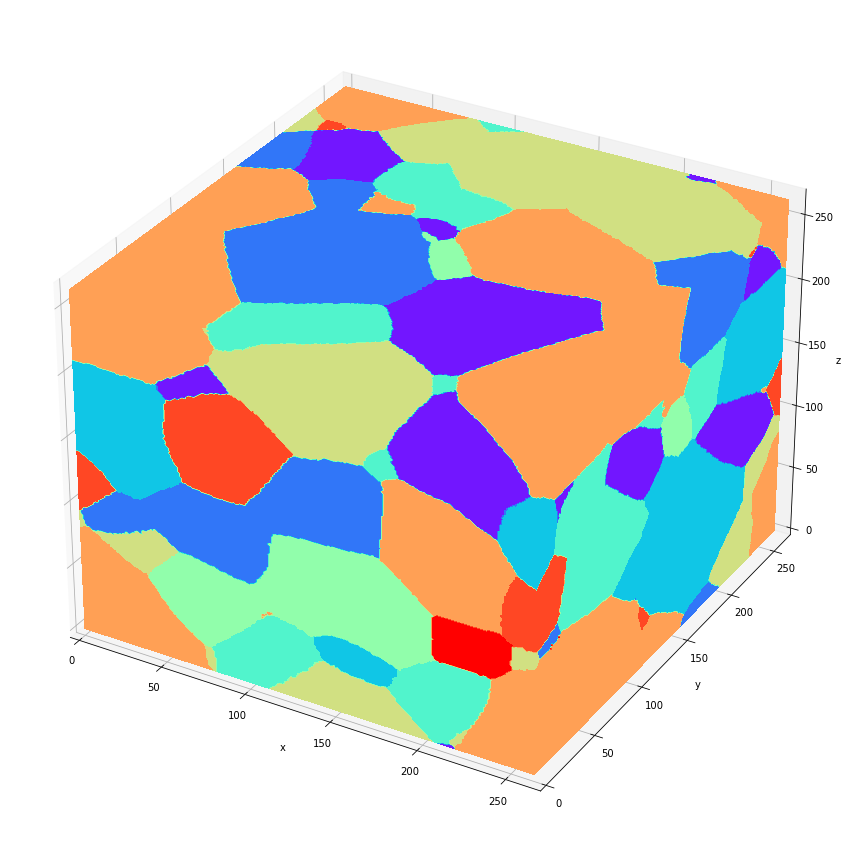

<Figure size 432x288 with 0 Axes>

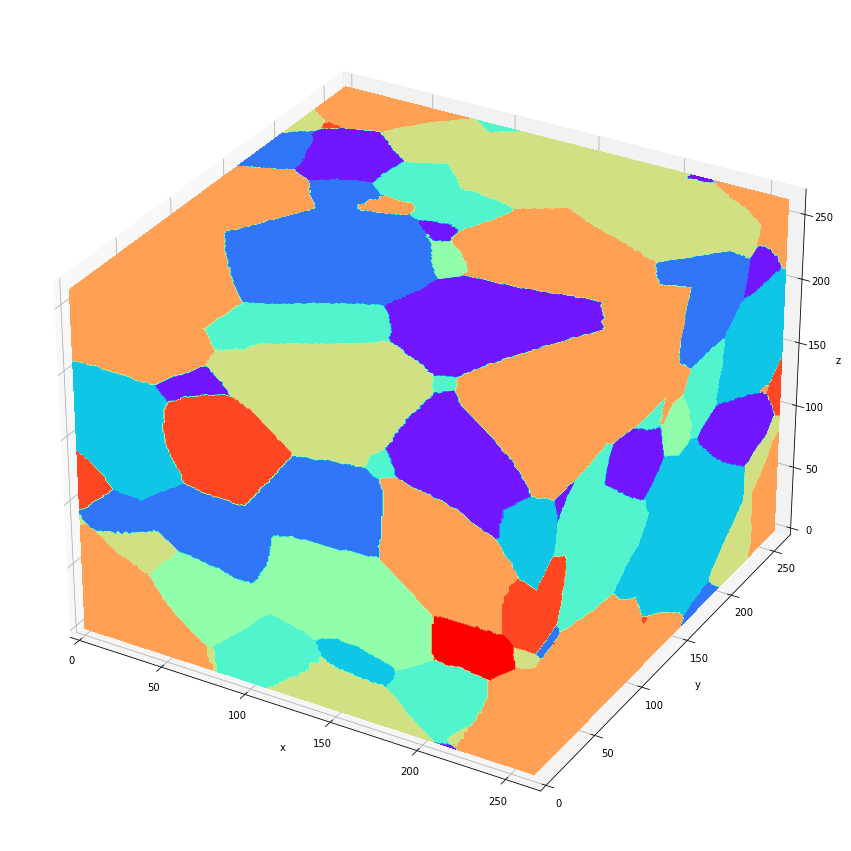

<Figure size 432x288 with 0 Axes>

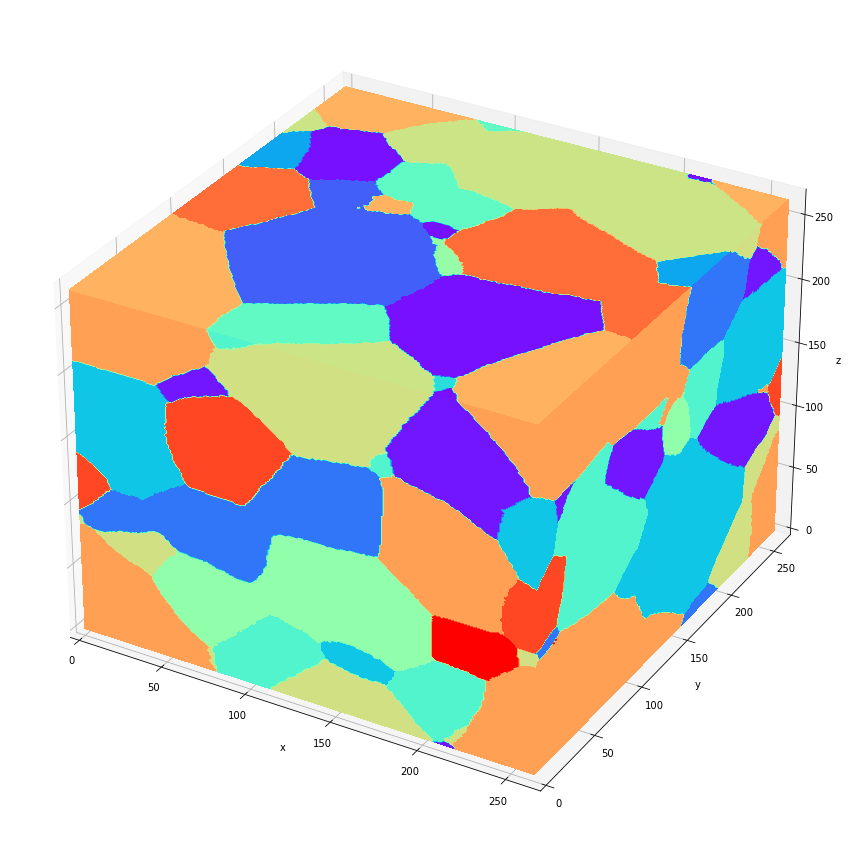

<Figure size 432x288 with 0 Axes>

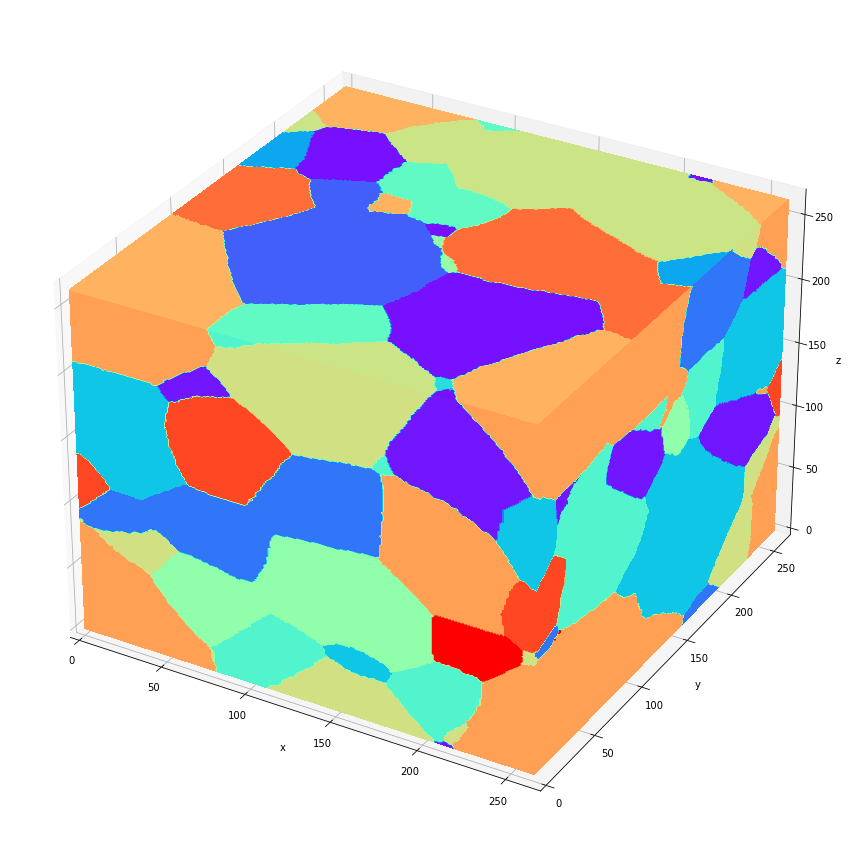

<Figure size 432x288 with 0 Axes>

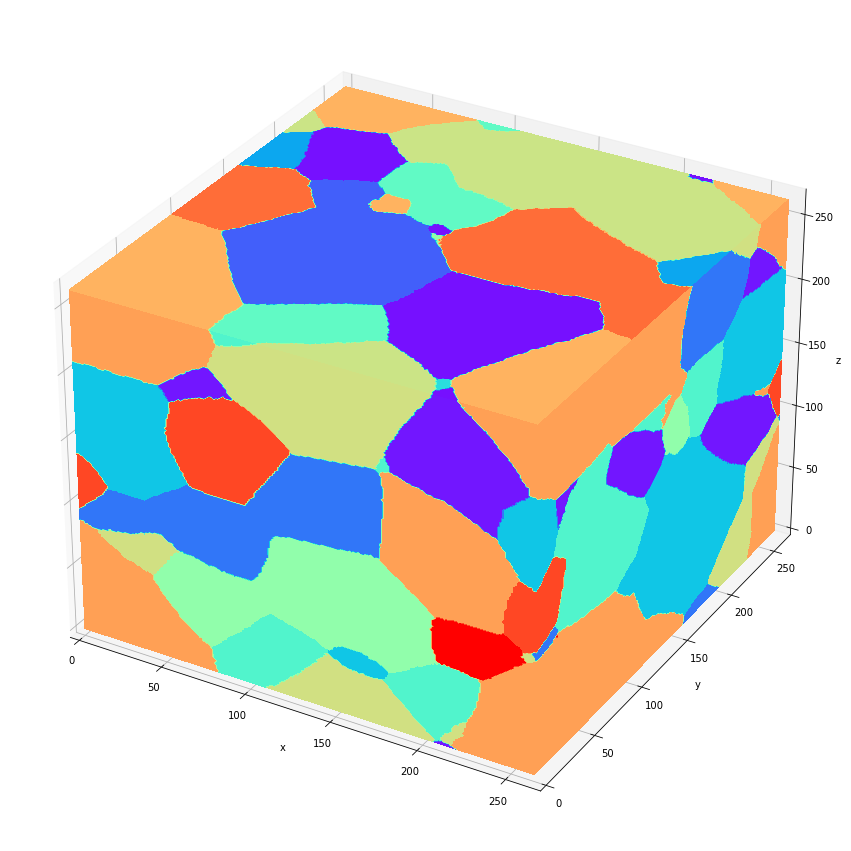

<Figure size 432x288 with 0 Axes>

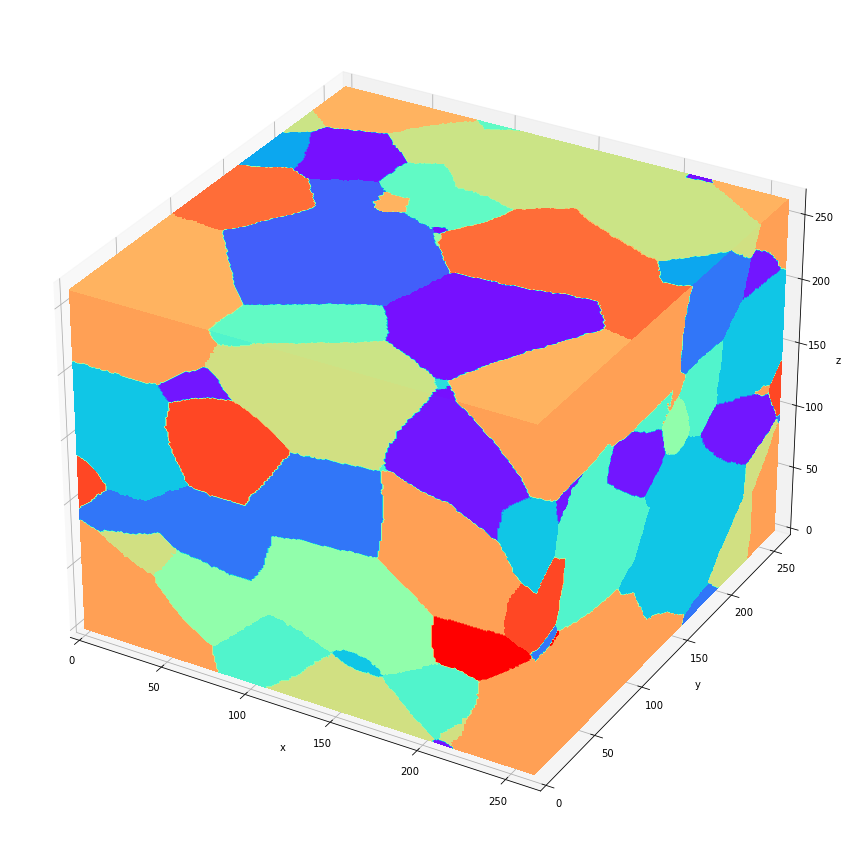

<Figure size 432x288 with 0 Axes>

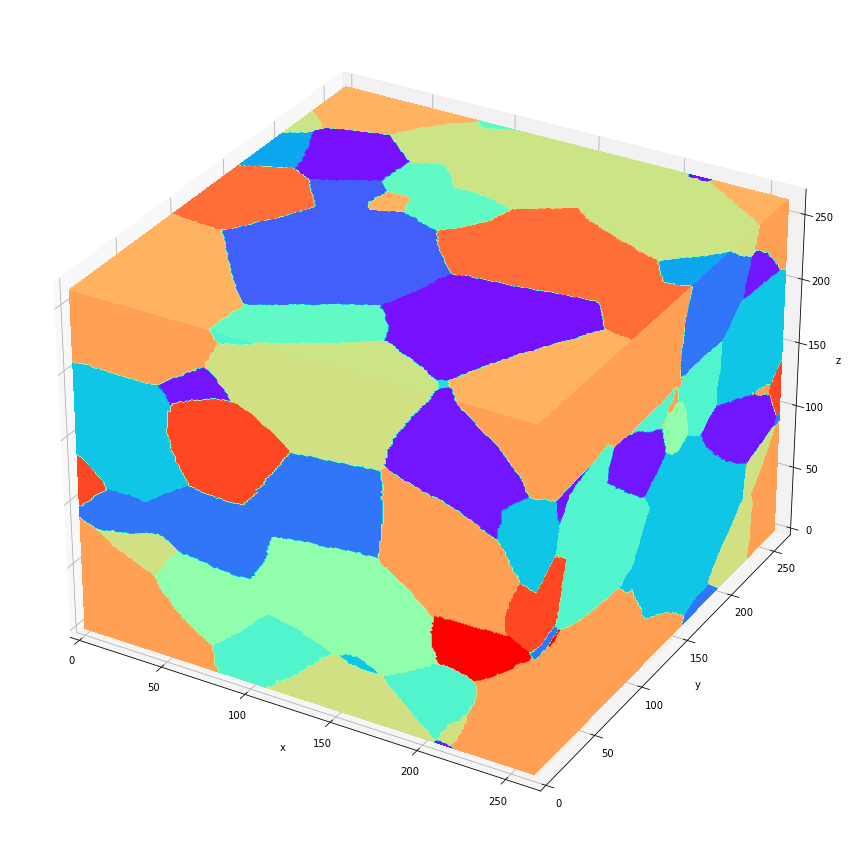

<Figure size 432x288 with 0 Axes>

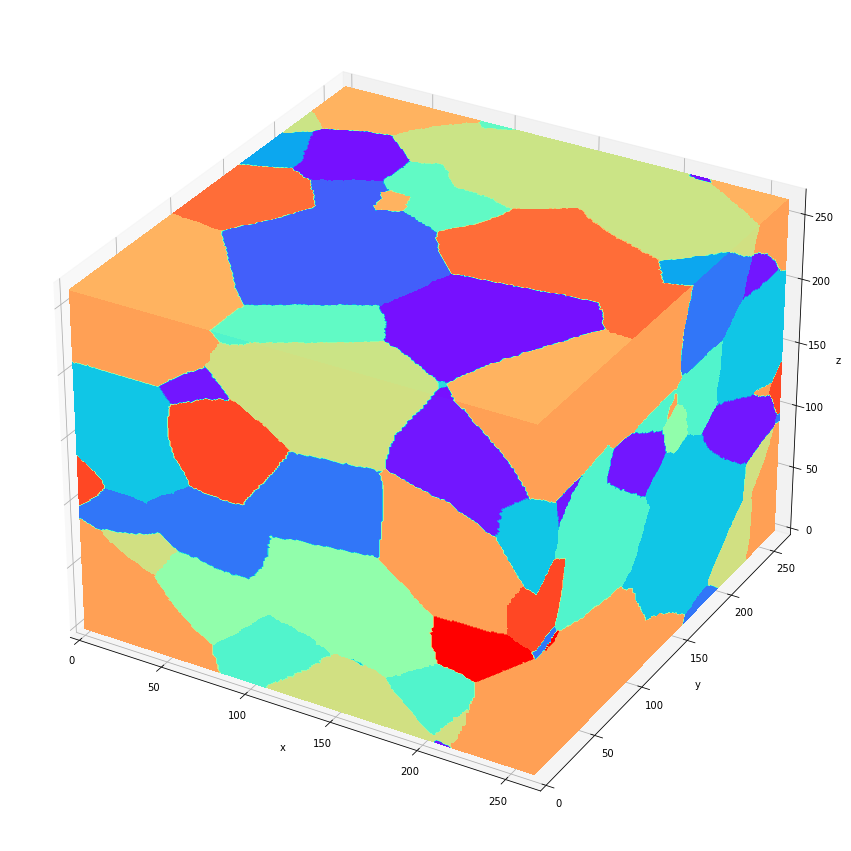

In [ ]:
# 3D Volumetric Contour Visualization and Surface Projection Analysis
# ==================================================================

"""
Advanced 3D Microstructure Contour Visualization

This section creates comprehensive 3D volumetric visualizations of microstructure
evolution using contour surface projections. It generates publication-quality
3D plots that show grain structures projected onto domain boundaries, providing
intuitive visualization of complex 3D grain arrangements.

Visualization Methodology:
-------------------------
- Surface Projections: Grain data projected onto domain faces
- Contour Mapping: Surface contours show grain boundaries and structure
- Rainbow Colormap: Enhanced grain distinction in 3D space
- Multi-Frame Animation: Complete temporal evolution documentation

3D Projection Strategy:
----------------------
- XY plane projection: Top surface (Z=max)
- YZ plane projection: Front surface (X=0)  
- XZ plane projection: Side surface (Y=max)
- Coordinate system: Proper 3D orientation with labeled axes

Technical Features:
------------------
- High-resolution output: 400 DPI for publication quality
- Large figure format: 15×20 inches for detailed visualization
- Axis labeling: Clear spatial orientation indicators
- Domain boundaries: Full extent visualization for context
"""

print("\\nStarting 3D volumetric contour visualization...")
print("Processing isotropic microstructure evolution...")

# Process complete time series for 3D visualization
for time_step in range(1, npy_file_iso.shape[0]):
    print(f"  Generating 3D contour plot for timestep {time_step}/{npy_file_iso.shape[0]-1}...")
    
    # Configure output path for 3D visualization
    figure_path = current_path + f"/microstructure_figures/3Dmicrostructure_{data_type}_whole_step{time_step}"
    
    # Extract current timestep 3D microstructure data
    current_data = npy_file_iso[time_step]
    size_x, size_y, size_z = current_data.shape
    
    print(f"    Processing 3D volume: {size_x}×{size_y}×{size_z}")
    
    # Generate 3D coordinate meshgrid for contour plotting
    X, Y, Z = np.meshgrid(np.arange(size_x), np.arange(size_y), np.arange(size_z))
    
    # Initialize 3D figure with large format for detailed visualization
    plt.figure()
    fig = plt.figure(figsize=(15, 20))
    ax = fig.add_subplot(projection='3d')
    
    # Configure colormap parameters for consistent grain visualization
    kw = {
        'vmin': current_data.min(),    # Minimum grain ID for color normalization
        'vmax': current_data.max(),    # Maximum grain ID for full color range
        'cmap': 'rainbow',             # Rainbow colormap for grain distinction
    }
    
    print(f"    Creating surface projections...")
    
    # Create 3D contour surface projections on domain boundaries
    
    # Top surface projection (XY plane at Z=max)
    _ = ax.contourf(
        X[:, :, -1], Y[:, :, -1], current_data[:, :, -1],
        zdir='z', offset=Z.max(), **kw
    )
    
    # Front surface projection (YZ plane at X=0)
    _ = ax.contourf(
        X[0, :, :], current_data[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw
    )
    
    # Side surface projection (XZ plane at Y=max)
    C = ax.contourf(
        current_data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kw
    )
    
    # Configure 3D plot appearance and labeling
    # ax.axis("off")  # Uncomment to hide axes for clean presentation
    plt.xlabel(r"x", fontsize=10)
    plt.ylabel(r"y", fontsize=10)
    ax.set_zlabel(r"z", fontsize=10)
    
    # Set axis limits to show complete domain
    plt.xlim([0, size_x])
    plt.ylim([0, size_y])
    ax.set_zlim([0, size_z])
    
    # Save high-resolution 3D visualization
    # plt.savefig(figure_path+"_micro.png", dpi=400, bbox_inches='tight')
    
    print(f"    ✓ 3D contour visualization completed for timestep {time_step}")

print(f"\\n🎉 3D volumetric contour visualization completed!")
print(f"   Generated {npy_file_iso.shape[0]-1} high-resolution 3D contour plots")
print(f"   Each plot shows surface projections on all three domain boundaries")
print(f"   Resolution: {size_x}×{size_y}×{size_z} with rainbow colormap visualization")

# Alternative multi-slice visualization approach (currently commented)
"""
Alternative Visualization: Multi-Slice 3D Projection

This commented section provides an alternative approach for 3D visualization
using multiple parallel slices through the volume instead of boundary projections.
It can be enabled by uncommenting the code block below.

Features:
- Multiple parallel slices: 1/3, 2/3, and boundary planes
- Viridis colormap: Alternative color scheme for different visual emphasis
- Internal structure: Reveals grain arrangements inside the volume
- Comparative analysis: Multiple energy methods side-by-side
"""

## 3D Microstructure Analysis Summary and Conclusions

### Comprehensive 3D Visualization Achievements

This notebook successfully demonstrates advanced 3D microstructure analysis capabilities for large-scale polycrystalline systems:

#### Key Analytical Capabilities

1. **Large-Scale Processing**: Successfully handled 264³ domain with 5000 grains
2. **Multi-Method Comparison**: Systematic analysis of isotropic vs. anisotropic energy formulations
3. **Cross-Sectional Analysis**: Comprehensive slicing across all three spatial dimensions
4. **3D Contour Visualization**: Advanced surface projection techniques for volumetric data
5. **Temporal Evolution**: Complete time-series documentation of 3D grain growth

#### Technical Achievements

- **Computational Efficiency**: Optimized processing for HiPerGator 64-core systems
- **Visualization Quality**: High-resolution 3D plots suitable for scientific publication  
- **Systematic Analysis**: Automated cross-sectional processing across multiple dimensions
- **Data Management**: Efficient handling of large 5D datasets (time, x, y, z, features)
- **Flexible Framework**: Modular approach supporting multiple energy methods

#### Scientific Impact

The 3D analysis provides essential insights for:

1. **Energy Method Validation**: Systematic comparison of different energy formulations in 3D
2. **Grain Growth Mechanisms**: Documentation of 3D grain boundary evolution patterns
3. **Microstructure Characterization**: Comprehensive cross-sectional analysis capabilities
4. **Algorithm Benchmarking**: Validation of computational methods for large 3D systems
5. **Visualization Standards**: Establishment of publication-quality 3D visualization protocols

#### Research Applications

- **Materials Science**: 3D microstructure evolution in polycrystalline materials
- **Computational Methods**: Algorithm validation for large-scale 3D simulations
- **Visualization Techniques**: Advanced 3D rendering methods for scientific data
- **Energy Method Development**: Systematic comparison of energy calculation approaches
- **High-Performance Computing**: Optimization strategies for large 3D datasets

### Future Enhancements

1. **Interactive Visualization**: Development of interactive 3D exploration tools
2. **Quantitative Analysis**: Implementation of 3D grain size and shape analysis
3. **Comparative Metrics**: Statistical comparison of energy method effects in 3D
4. **Animation Capabilities**: Enhanced time-series animation for grain evolution
5. **Multi-Scale Analysis**: Integration with smaller and larger scale studies

### Computational Specifications

- **Domain Resolution**: 264×264×264 lattice points
- **Initial Grain Count**: 5000 oriented polycrystalline grains
- **Processing Power**: 64-core HiPerGator parallel optimization
- **Memory Requirements**: Large-scale 5D array processing capabilities
- **Output Quality**: 400 DPI publication-ready visualizations

---
*Advanced 3D microstructure analysis completed using the VECTOR framework*  
*Large-scale visualization capabilities demonstrated for realistic polycrystalline systems*